In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import os
import time
import random
import math
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import cKDTree
import pandas as pd
import re

In [2]:
filename = 'treecode_out_EQUILIBRIUM_1.txt'

# Open the file and read initial information
fp = open(filename, 'r')

Npart = int(fp.readline())       # Number of particles
Nd = int(fp.readline())          # Number of dimensions (usually 3)

fp.seek(0)                       # Reset file pointer to beginning
Nlines = len(fp.readlines())    # Count total lines in the file
fp.close()

Nlines_in_snapshot = 3 + 3*Npart
Nsnapshots = Nlines//Nlines_in_snapshot

x = np.empty([Nsnapshots,Npart,Nd])
v = np.empty([Nsnapshots,Npart,Nd])

print("Npart =", Npart)
print("Nd =", Nd)
print("Nlines =", Nlines)
print("Nlines_in_snapshot =", Nlines_in_snapshot)
print("Nsnapshots =",Nsnapshots)
print(x.shape)
print(v.shape)

# read the masses:
start_time=time.time()

masses = np.genfromtxt(filename,skip_header=3,max_rows=Npart)

# read the times, positions and velocities
t = np.empty([Nsnapshots])

for i_snapshot in range(Nsnapshots):
    initial_line = i_snapshot*Nlines_in_snapshot
    initial_line_m = initial_line + 3
    initial_line_x = initial_line_m+Npart
    initial_line_v = initial_line_x+Npart
    
    t[i_snapshot] = np.genfromtxt(filename,skip_header=initial_line+2,max_rows=1)
    x[i_snapshot] = np.genfromtxt(filename,skip_header=initial_line_x,max_rows=Npart)
    v[i_snapshot] = np.genfromtxt(filename,skip_header=initial_line_v,max_rows=Npart)

end_time = time.time()
print(end_time-start_time)

Npart = 30000
Nd = 3
Nlines = 6030201
Nlines_in_snapshot = 90003
Nsnapshots = 67
(67, 30000, 3)
(67, 30000, 3)
226.7694923877716


In [9]:
# --- System Parameters (rescaled units) ---
# Note: these are simulation units, not physical (i.e., G = 1, lengths in kpc, masses normalized)

M_H= 1000 # Halo mass in simulation units (corresponds to 10^12 M_sun)
M_D = np.sum(masses) # Total mass of the disk (from simulation data)
G = 1 # Gravitational constant in code units

a = 3 # Disk scale radius [kpc]
b = 0.1 * a # Disk scale height [kpc] 

R_max = 30  # kpc
z_max = 5  # esempio di limite massimo per z

a_H = 10 # Hernquist halo scale radius [kpc]

# Print mass ratio for quick diagnostics
print(f"Halo-to-disk mass ratio: {M_H / M_D:.2f}")

Halo-to-disk mass ratio: 29.18


In [4]:
raggi = np.sqrt(x[:, :, 0]**2 + x[:, :, 1]**2 + x[:, :, 2]**2)
# Volume density (Miyamoto-Nagai)
def rho_D(R, z):
    sqrt_zb = np.sqrt(z**2 + b**2)
    num = b**2*M_D*(a*R**2 + (a + 3*sqrt_zb)*(a + sqrt_zb)**2)
    den = 4*np.pi*(R**2 + (a + sqrt_zb)**2)**(5/2)*(z**2 + b**2)**(3/2)
    return num / den

raggi[0].shape    

(30000,)

In [5]:
rho_mean = np.mean(rho_D(np.array(raggi[0]), np.array(x[0, :, 2])))
t_dyn = np.sqrt(1/rho_mean)
t_stop = 100
n_times = t_stop / t_dyn

print(f'Dynamical timescale = {t_dyn}')
print("number of dynamical times in the simulation", n_times)

Dynamical timescale = 2.4733841533570025
number of dynamical times in the simulation 40.430436114937876


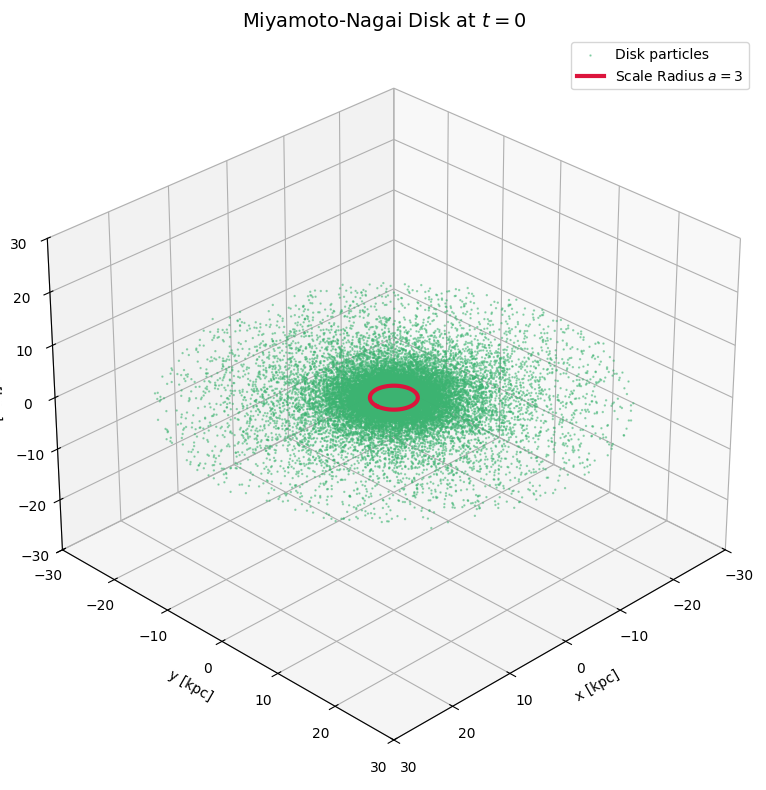

In [6]:
# 3D plot of particle positions at t = 0
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the disk particles
ax.scatter(x[0, :, 0], x[0, :, 1], x[0, :, 2],
           s=0.5, color='mediumseagreen', alpha=0.5, label='Disk particles', zorder=1)

# Plot the scale radius circle (a = 3) in the xy-plane
a = 3
theta_circ = np.linspace(0, 2 * np.pi, 100)
circle_x = a * np.cos(theta_circ)
circle_y = a * np.sin(theta_circ)
circle_z = np.zeros_like(theta_circ)

ax.plot(circle_x, circle_y, circle_z,
        color='crimson', lw=3, label='Scale Radius $a=3$', zorder=10)

# Axis labels and title
ax.set_title("Miyamoto-Nagai Disk at $t = 0$", fontsize=14)
ax.set_xlabel("x [kpc]")
ax.set_ylabel("y [kpc]")
ax.set_zlabel("z [kpc]")

# Axis limits
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(-30, 30)

# Viewing angle to improve visibility
ax.view_init(elev=30, azim=45)

# Show legend and plot
ax.legend()
plt.tight_layout()
plt.show()

Softening parameter per snapshot:
Snapshot 0: softening = 0.10508
Snapshot 1: softening = 0.10503
Snapshot 2: softening = 0.10507
Snapshot 3: softening = 0.10502
Snapshot 4: softening = 0.10504
Snapshot 5: softening = 0.10503
Snapshot 6: softening = 0.10503
Snapshot 7: softening = 0.10506
Snapshot 8: softening = 0.10508
Snapshot 9: softening = 0.10504
Snapshot 10: softening = 0.10502
Snapshot 11: softening = 0.10502
Snapshot 12: softening = 0.10504
Snapshot 13: softening = 0.10505
Snapshot 14: softening = 0.10509
Snapshot 15: softening = 0.10510
Snapshot 16: softening = 0.10505
Snapshot 17: softening = 0.10501
Snapshot 18: softening = 0.10503
Snapshot 19: softening = 0.10517
Snapshot 20: softening = 0.10506
Snapshot 21: softening = 0.10513
Snapshot 22: softening = 0.10511
Snapshot 23: softening = 0.10522
Snapshot 24: softening = 0.10502
Snapshot 25: softening = 0.10505
Snapshot 26: softening = 0.10503
Snapshot 27: softening = 0.10503
Snapshot 28: softening = 0.10509
Snapshot 29: soften

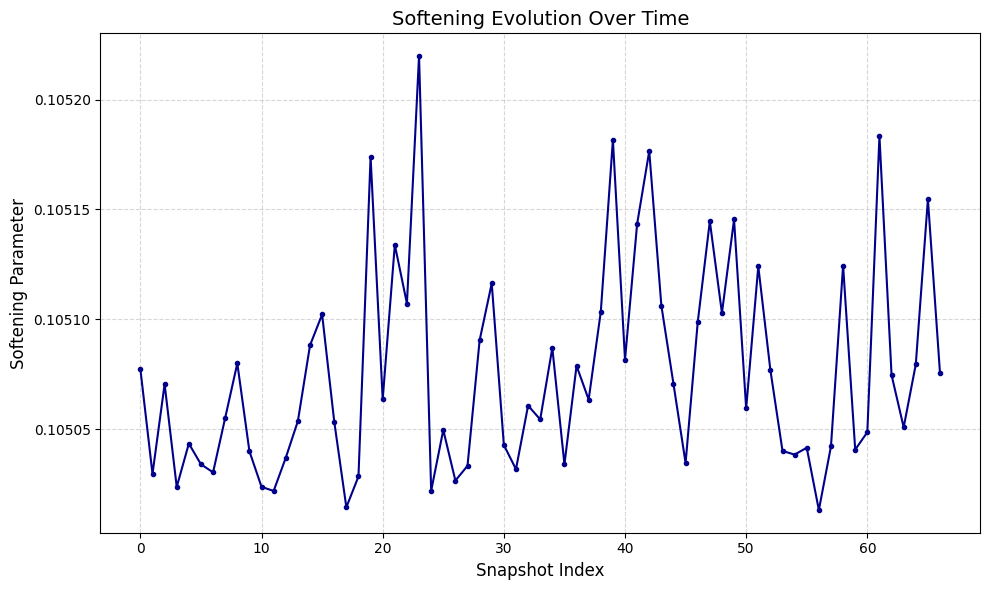

In [7]:
# List to store the softening parameter for each snapshot
softenings = []

# Loop over all snapshots to compute softening values
for tt in range(Nsnapshots):
    # Compute the 3D radial distance of each particle
    ragg = np.sqrt(x[tt, :, 0]**2 + x[tt, :, 1]**2 + x[tt, :, 2]**2)
    rho = rho_D(ragg, x[tt, :, 2])
    rho_max = np.max(rho)
    volume = M_D / rho_max
    softening = (volume / Npart)**(1/3)
    softenings.append(softening)

# Print the softening parameter for each snapshot
print("Softening parameter per snapshot:")
for i, s in enumerate(softenings):
    print(f"Snapshot {i}: softening = {s:.5f}")

# Plot the evolution of the softening parameter over time
plt.figure(figsize=(10, 6))
plt.plot(range(Nsnapshots), softenings, color='darkblue', marker='o', markersize=3)
plt.xlabel('Snapshot Index', fontsize=12)
plt.ylabel('Softening Parameter', fontsize=12)
plt.title('Softening Evolution Over Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

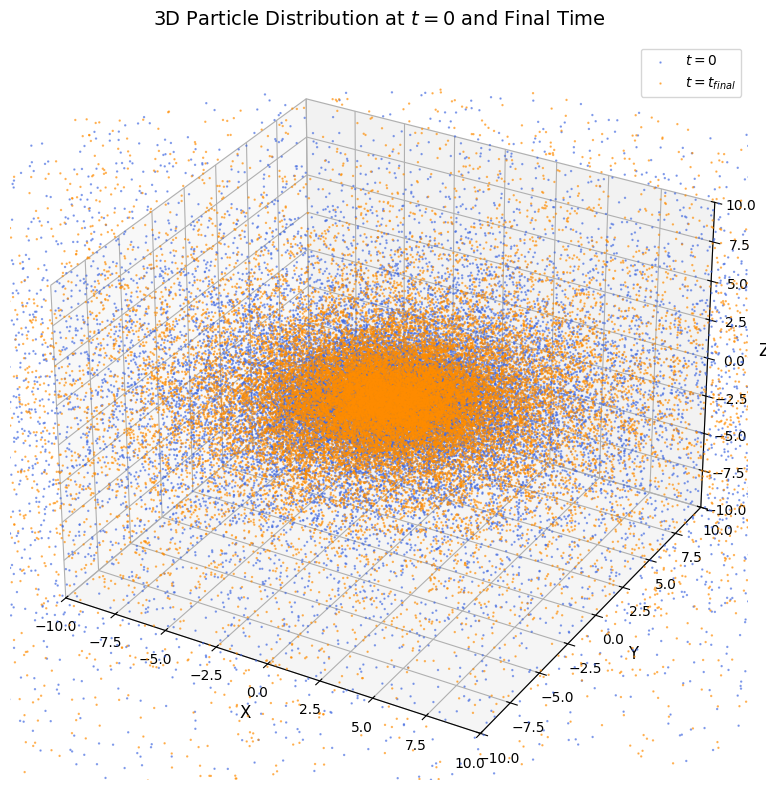

In [8]:
def potential_halo(R, z):
    r = np.sqrt(R**2 + z**2)
    return -G*M_H/(r + a_H)

def potential_disk(R, z):
    return -G*M_D / np.sqrt((a + np.sqrt(z**2 + b**2))**2 + R**2)

def tot_potential(R, z):
    return potential_halo(R, z) + potential_disk(R, z)    

# Plotting the 3D distribution of particles at t=0 and at the final snapshot
# Extract the first and last snapshot
x_first = x[0]      # t = 0
x_last = x[-1]      # t = last

# Extract x, y, z coordinates
x_particles_first = x_first[:, 0]
y_particles_first = x_first[:, 1]
z_particles_first = x_first[:, 2]

x_particles_last = x_last[:, 0]
y_particles_last = x_last[:, 1]
z_particles_last = x_last[:, 2]

# Create the 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for both time snapshots
ax.scatter(x_particles_first, y_particles_first, z_particles_first, 
           s=0.5, color='royalblue', alpha=0.6, label=r'$t = 0$')

ax.scatter(x_particles_last, y_particles_last, z_particles_last, 
           s=0.5, color='darkorange', alpha=0.6, label=r'$t = t_{final}$')

# Aesthetic settings
ax.set_title("3D Particle Distribution at $t=0$ and Final Time", fontsize=14, pad=12)
ax.set_xlabel("X", fontsize=12)
ax.set_ylabel("Y", fontsize=12)
ax.set_zlabel("Z", fontsize=12)

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()    

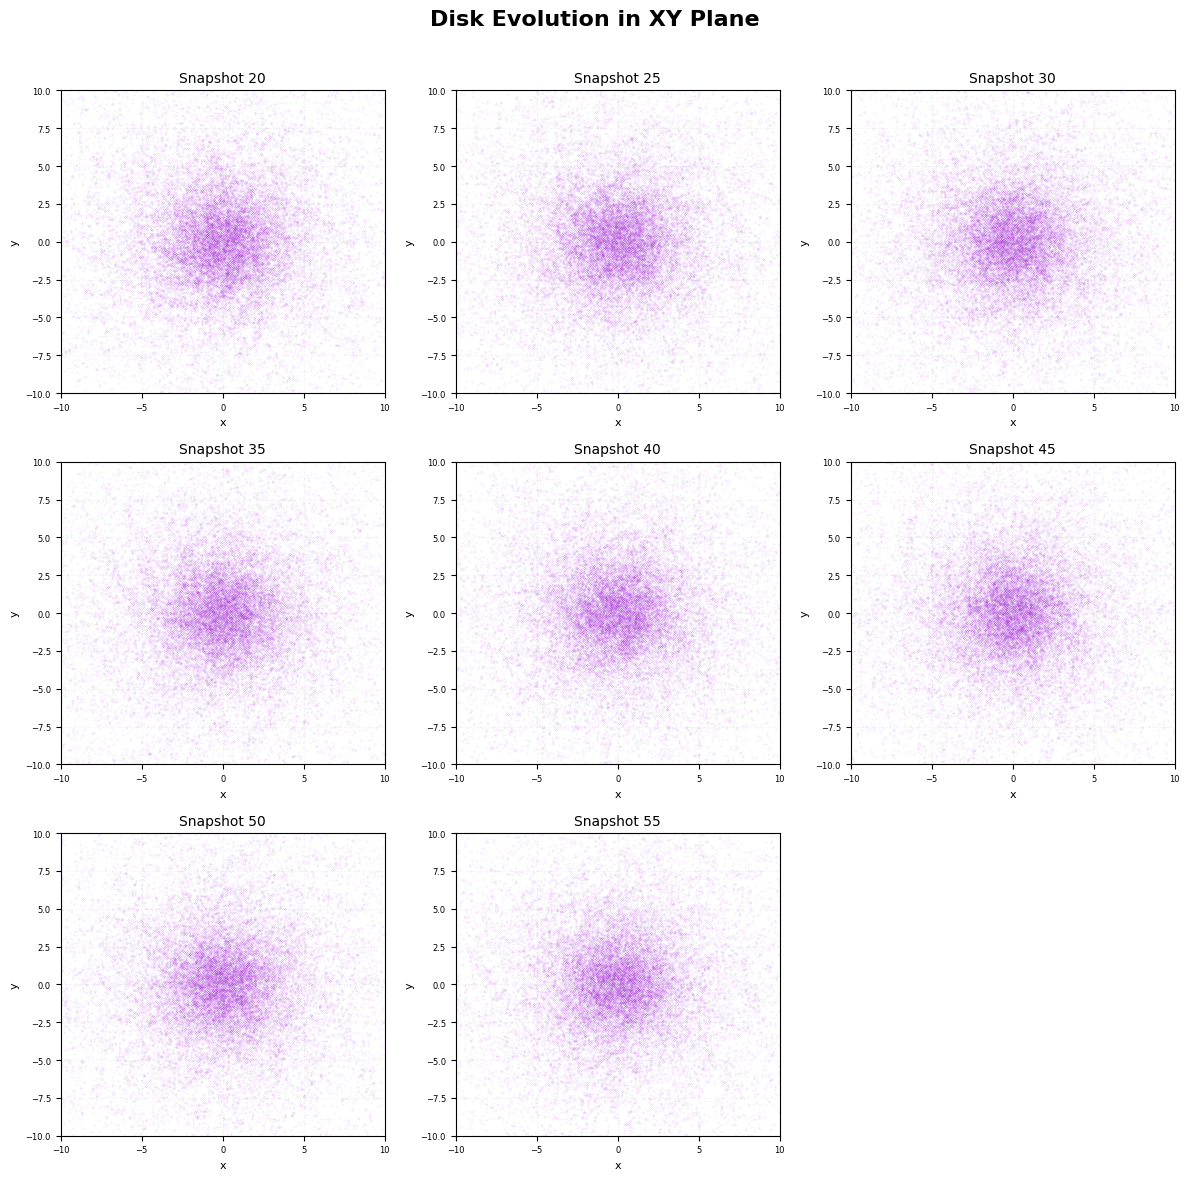

In [10]:
# Optimized visualization of the disk evolution in XY projection

begin_from_snap = 20
till_snap = 60
step = 5  # Use every 5 snapshots for clarity

snap_range = range(begin_from_snap, till_snap, step)
n_plots = len(snap_range)
grid_size = int(np.ceil(n_plots ** 0.5))  # Grid dimensions

plt.figure(figsize=(grid_size * 4, grid_size * 4))  # Adjust size based on grid

for i, snap in enumerate(snap_range):
    plt.subplot(grid_size, grid_size, i + 1)
    plt.scatter(x[snap, :, 0], x[snap, :, 1], s=0.01, color='darkviolet', alpha=0.4)
    plt.title(f"Snapshot {snap}", fontsize=10)
    plt.xlabel("x", fontsize=8)
    plt.ylabel("y", fontsize=8)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid(True, linestyle=':', alpha=0.2)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

plt.suptitle("Disk Evolution in XY Plane", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for the suptitle
plt.savefig("xy_disk_evolution_equilibrium.png", dpi=300, bbox_inches="tight")
plt.show()

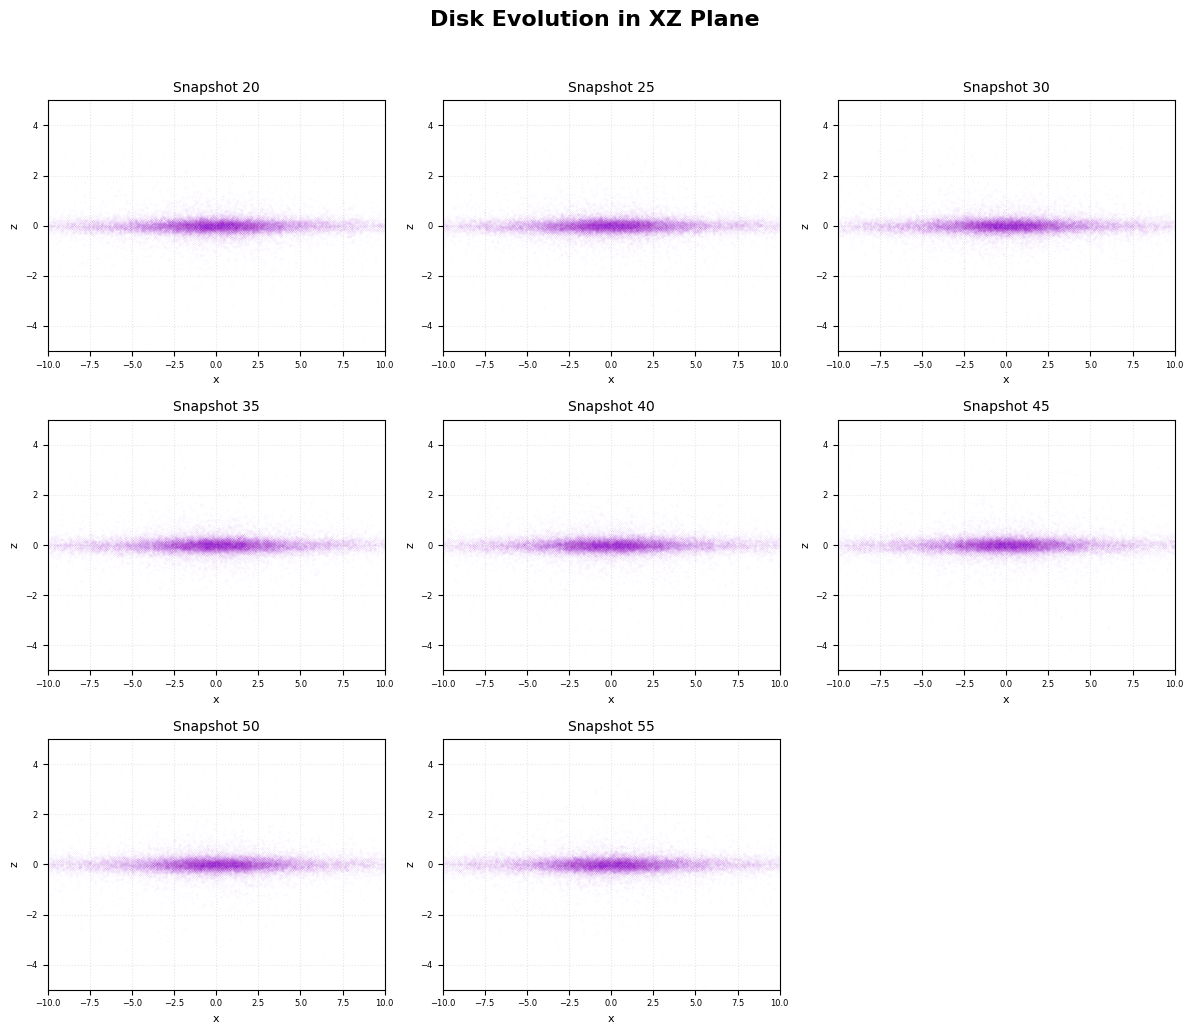

In [11]:
# Optimized visualization of the disk evolution in XZ projection

begin_from_snap = 20
till_snap = 60
step = 5  # Plot one every 5 snapshots

snap_range = range(begin_from_snap, till_snap, step)
n_plots = len(snap_range)
grid_size = int(np.ceil(n_plots ** 0.5))

plt.figure(figsize=(grid_size * 4, grid_size * 3.5))

for i, snap in enumerate(snap_range):
    plt.subplot(grid_size, grid_size, i + 1)
    plt.scatter(x[snap, :, 0], x[snap, :, 2], s=0.001, color='darkviolet', alpha=0.4)
    plt.title(f"Snapshot {snap}", fontsize=10)
    plt.xlabel("x", fontsize=8)
    plt.ylabel("z", fontsize=8)
    plt.xlim(-10, 10)
    plt.ylim(-5, 5)
    plt.grid(True, linestyle=':', alpha=0.3)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

plt.suptitle("Disk Evolution in XZ Plane", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

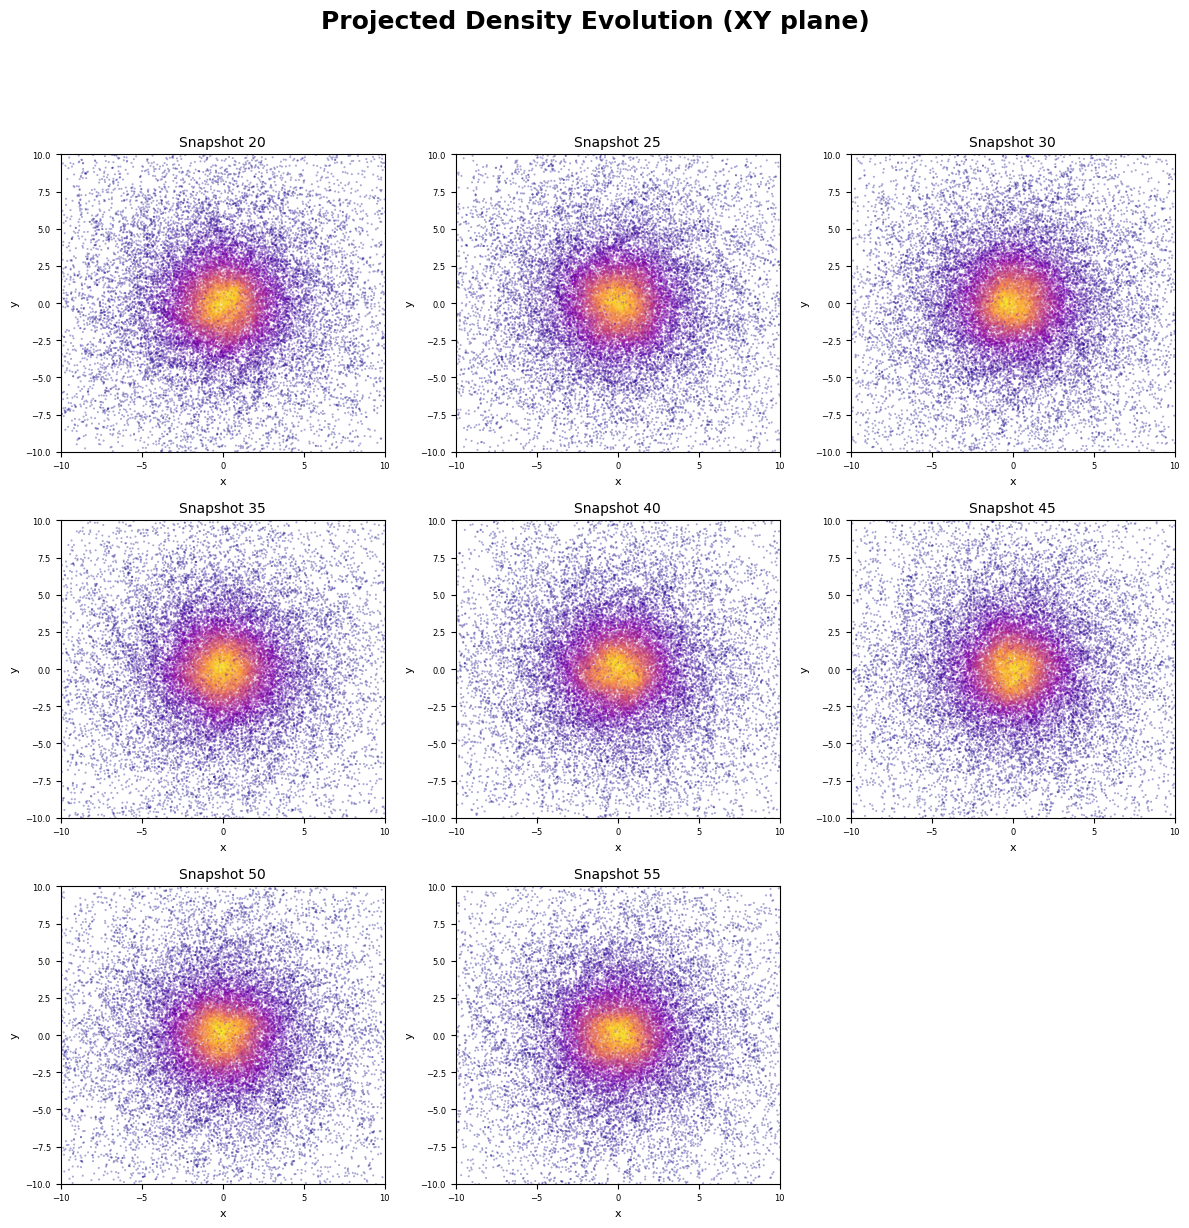

In [13]:
# Grid parameters for subplots
begin_from_snap = 20
till_snap = 60
step = 5

snap_range = range(begin_from_snap, till_snap, step)
n_plots = len(snap_range)
grid_size = int(np.ceil(n_plots**0.5))

plt.figure(figsize=(grid_size * 4, grid_size * 4))
plt.suptitle("Projected Density Evolution (XY plane)", fontsize=18, weight='bold', y=1.02)

for i, snap in enumerate(snap_range):
    plt.subplot(grid_size, grid_size, i + 1)

    # Build KDTree for current snapshot positions
    tree = cKDTree(x[snap])

    # Compute distance to the 800th nearest neighbor
    distances, _ = tree.query(x[snap], k=800)

    # Estimate local density using the volume of the sphere enclosing 800 neighbors
    volumes = (4/3) * np.pi * distances[:, -1]**3
    densities = 1 / volumes

    # Scatter plot with color-coded density
    plt.scatter(x[snap, :, 0], x[snap, :, 1], c=densities, s=0.2, cmap='plasma', alpha=0.4)
    plt.title(f"Snapshot {snap}", fontsize=10)
    plt.xlabel("x", fontsize=8)
    plt.ylabel("y", fontsize=8)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.grid(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("xy_disk_density_equilibrium.png", dpi=300, bbox_inches="tight")
plt.show()

In [99]:
# Output filename for the GIF
gif_filename = 'Equ.gif'

# Create the animation only if it doesn't already exist
if not os.path.exists(gif_filename):

    num_frames = x.shape[0]    # Total number of snapshots
    num_particles = x.shape[1] # Number of particles per snapshot

    def update(frame):
        """Updates the scatter plot with particle positions for the given frame."""
        coords = x[frame]
        scat._offsets3d = (coords[:, 0], coords[:, 1], coords[:, 2])
        title.set_text(f"Snapshot {frame}")
        return scat, title

    # Create the 3D figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Initial scatter plot for the first frame
    scat = ax.scatter(x[0, :, 0], x[0, :, 1], x[0, :, 2], c='teal', s=0.2, alpha=0.5)

    # Axis settings
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_zlim(-5, 5)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    # Add a dynamic title
    title = ax.set_title("Snapshot 0", fontsize=14)

    # Create the animation
    ani = FuncAnimation(
        fig,
        update,
        frames=num_frames,
        interval=150,  # ms between frames
        blit=False
    )

    # Save the GIF
    ani.save(gif_filename, writer=PillowWriter(fps=10))
    print(f"GIF successfully saved as '{gif_filename}'.")

    plt.close()
else:
    print(f"The GIF '{gif_filename}' already exists. Skipping creation.")

The GIF 'Equ.gif' already exists. Skipping creation.


In [100]:
# Output filename
gif_filename = 'equ_density.gif'

# Create the gif only if it doesn't exist
if not os.path.exists(gif_filename):

    num_frames = x.shape[0]
    N = x.shape[1]
    n_neighbors = 600

    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Compute initial densities (for consistent color scale)
    tree = cKDTree(x[0])
    distances, _ = tree.query(x[0], k=n_neighbors)
    volumes = (4/3) * np.pi * distances[:, -1]**3
    initial_densities = 1 / volumes

    # Create scatter plot with initial snapshot
    scat = ax.scatter(x[0, :, 0], x[0, :, 1], c=initial_densities, cmap='plasma', s=0.2)
    cbar = plt.colorbar(scat, ax=ax)
    cbar.set_label('Local Density')

    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_title("Density Evolution with Snapshot Rotation", fontsize=14)

    def update(frame):
        coords = x[frame]

        # Calculate local density using cKDTree
        tree = cKDTree(coords)
        distances, _ = tree.query(coords, k=n_neighbors)
        volumes = (4/3) * np.pi * distances[:, -1]**3
        densities = 1 / volumes

        # Apply rotation (simulate camera orbiting in 2D)
        angle = np.deg2rad(frame * 2)  # Rotate 2° per frame
        rot_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                               [np.sin(angle),  np.cos(angle)]])
        rotated_coords = coords[:, :2].dot(rot_matrix.T)

        scat.set_offsets(rotated_coords)
        scat.set_array(densities)
        return scat,

    # Build the animation
    ani = FuncAnimation(fig, update, frames=num_frames, interval=150, blit=False)

    # Save the animation
    ani.save(gif_filename, writer=PillowWriter(fps=10))
    print(f"GIF successfully saved as '{gif_filename}'.")

    plt.close()
else:
    print(f"The gif '{gif_filename}' already exists.")

The gif 'equ_density.gif' already exists.


### Simulation Visualization

<div style="display: flex; justify-content: space-around;">
    <div style="text-align: center;">
        <p><strong>3D Particle Evolution</strong></p>
        <img src="equ.gif" width="400" />
    </div>
    <div style="text-align: center;">
        <p><strong>Density Map Evolution</strong></p>
        <img src="equ_density.gif" width="400" />
    </div>
</div>

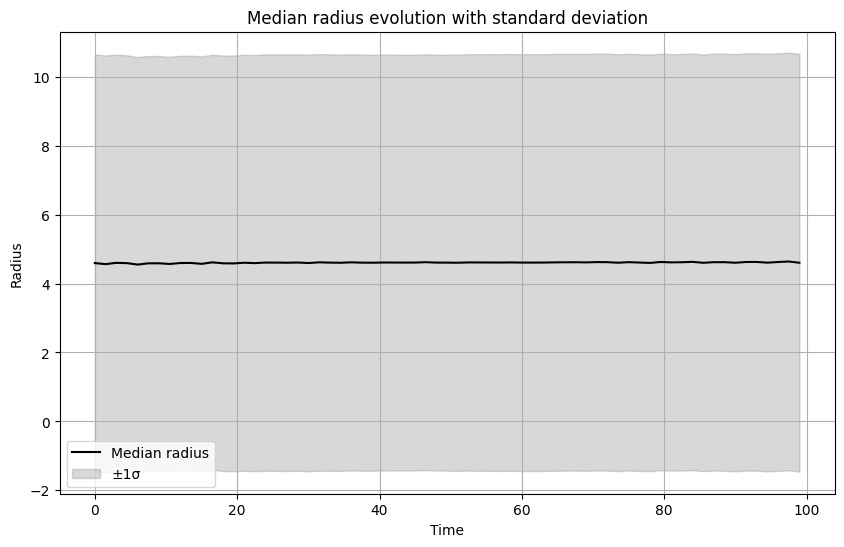

In [14]:
r_median = np.median(raggi, axis=1)
r_std = np.std(raggi, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(t, r_median, label='Median radius', color='black')
plt.fill_between(t, r_median - r_std, r_median + r_std, alpha=0.3, color='gray', label='±1σ')
plt.xlabel("Time")
plt.ylabel("Radius")
plt.title("Median radius evolution with standard deviation")
plt.legend()
plt.grid(True)
plt.show()

## Evolution of the Median Radius Over Time

This plot shows the evolution of the median radius of all disk particles over the course of the simulation, with a shaded band representing the standard deviation (±1σ) at each snapshot.

1.The median radius remains almost constant, confirming the dynamical stability of the system.

2.The wide gray area reflects the spread in particle distribution, which is expected due to the initial conditions and range of orbits.

No significant radial migration or drift is observed, validating the correct initialization of an equilibrium configuration.

## Equilibrium Analysis: From Structure to Dynamics 

In this section, we perform a comprehensive analysis of the equilibrium configuration of the stellar disk embedded in a static Hernquist halo. The goal is to verify the long-term stability and dynamical behavior of the system after initialization.

The following diagnostics are included:

1. **Center of Mass Evolution**
We track the center of mass (CoM) of the system over time to ensure that the disk remains spatially stable and does not exhibit bulk drift.

2. **Velocity Distribution**
We analyze the distribution of particle velocities at various time steps to verify kinematic stability and the absence of significant heating or perturbations.

3. **Lagrangian Radii**
The evolution of Lagrangian radii (enclosing fixed mass fractions) provides insights into the conservation of mass distribution over time.

4. **Virial Theorem Check**
We compute the kinetic and potential energies throughout the simulation to verify the virial equilibrium condition: 2K+U=0. This is a fundamental consistency check for equilibrium systems.

5. **Fourier Analysis of Bar Formation**
Finally, we perform a Fourier decomposition of the surface density to detect any onset of bar-like structures, measuring their strength and orientation.

These tools provide both qualitative and quantitative confirmation that the system has been correctly initialized in equilibrium and evolves stably under the influence of the dark matter halo.

### Center of Mass

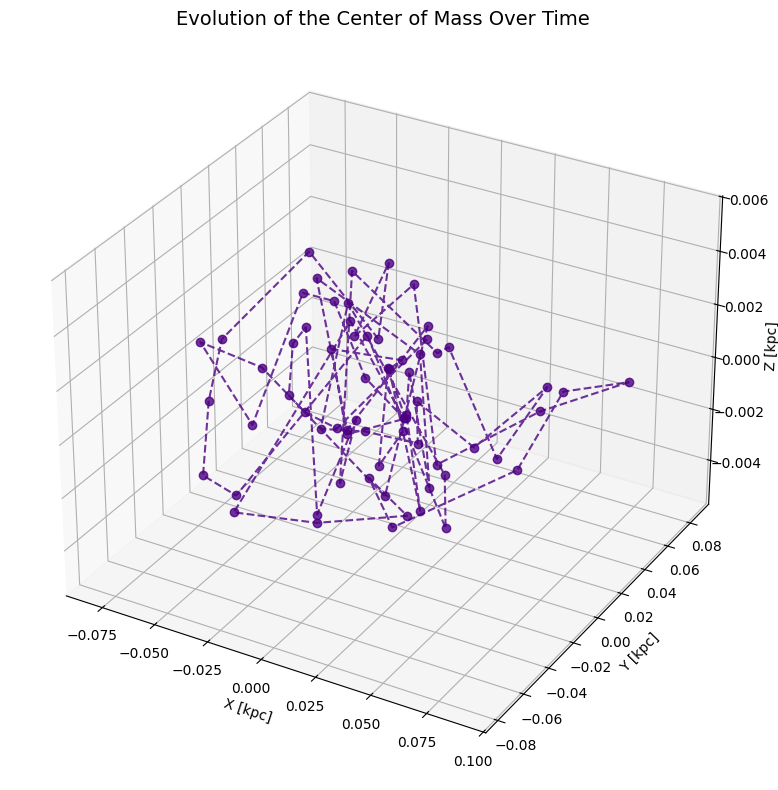

In [15]:
def calc_CoM(m, x):
    """
    Calculate and plot the center of mass (CoM) evolution in 3D space over time.

    Parameters:
    m : ndarray
        Masses of the particles, shape (Nparticles,)
    x : ndarray
        Positions of particles at all timesteps, shape (Ntimesteps, Nparticles, 3)

    Returns:
    Centers_oM : ndarray
        Center of mass positions at each timestep, shape (Ntimesteps, 3)
    """
    # Ensure mass array has the correct shape for broadcasting
    m = m[:, np.newaxis]

    # Compute the center of mass at each timestep
    Centers_oM = np.sum(m * x, axis=1) / np.sum(m)

    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(Centers_oM[:, 0], Centers_oM[:, 1], Centers_oM[:, 2],
            marker='o', linestyle='--', color='indigo', alpha=0.8)

    # Axis labels and title
    ax.set_xlabel("X [kpc]")
    ax.set_ylabel("Y [kpc]")
    ax.set_zlabel("Z [kpc]")
    ax.set_title("Evolution of the Center of Mass Over Time", fontsize=14)

    plt.tight_layout()
    plt.show()
    
    return Centers_oM

# Run the function and store the result
CoM = calc_CoM(masses, x)

## Center of Mass Motion and Poisson Noise

The velocity of the center of mass (CoM) is not expected to be exactly zero, even in equilibrium.  
This deviation arises from the fact that we are modeling a system with a **finite number of particles**, which leads to statistical fluctuations in their spatial and velocity distributions.

These fluctuations are a consequence of **Poissonian noise** in particle sampling. As a result, we expect the CoM to acquire a small residual velocity, whose magnitude scales approximately as:

$
v_{\text{CoM}} \sim \frac{1}{\sqrt{N}}
$

where \( N \) is the total number of particles.  
This relation serves as a benchmark to interpret any small CoM drift observed in the simulation.

In [16]:
# velocities fo the centre of mass:
vx_cm = np.gradient(CoM[:,0])/np.gradient(t)
vy_cm = np.gradient(CoM[:,1])/np.gradient(t)
vz_cm= np.gradient(CoM[:,2])/np.gradient(t)

# move all the particles to the centre of mass
x_no_cm = np.empty_like(x)
v_no_cm = np.empty_like(v)

for i in range(len(t)):
    for j in range(Npart):
        x_no_cm[i, j, 0] = x[i, j, 0] - CoM[i, 0]
        x_no_cm[i, j, 1] = x[i, j, 1] - CoM[i, 1]
        x_no_cm[i, j, 2] = x[i, j, 2] - CoM[i, 2]
        
        v_no_cm[i, j, 0] = v[i, j, 0] - vx_cm[i]
        v_no_cm[i, j, 1] = v[i, j, 1] - vy_cm[i]
        v_no_cm[i, j, 2] = v[i, j, 2] - vz_cm[i]

r_no_cm = np.sqrt(x_no_cm[:, :, 0]**2 + x_no_cm[:, :, 1]**2 + x_no_cm[:, :, 2]**2)
vr_no_cm = np.sqrt(v_no_cm[:, :, 0]**2 + v_no_cm[:, :, 1]**2 + v_no_cm[:, :, 2]**2)
positions_no_cm = x_no_cm

mod_v = np.sqrt(np.sum(v**2, axis=2))
v_mean = np.mean(mod_v, axis=1)

CoM_distance = np.sqrt(CoM[:, 0]**2 + CoM[:, 1]**2 + CoM[:, 2]**2)

delta_r = np.mean(CoM_distance)
v_cm = delta_r / np.diff(t)  
print('The velocity of the center of mass is:', np.mean(v_cm))

v_cm_exp = np.mean(v_mean) / np.sqrt(Npart)
print('The expected velocity of the CoM is:', v_cm_exp)

The velocity of the center of mass is: 0.028734900852727514
The expected velocity of the CoM is: 0.027059474268645797


### Visualizing Particle Distribution Relative to the Center of Mass

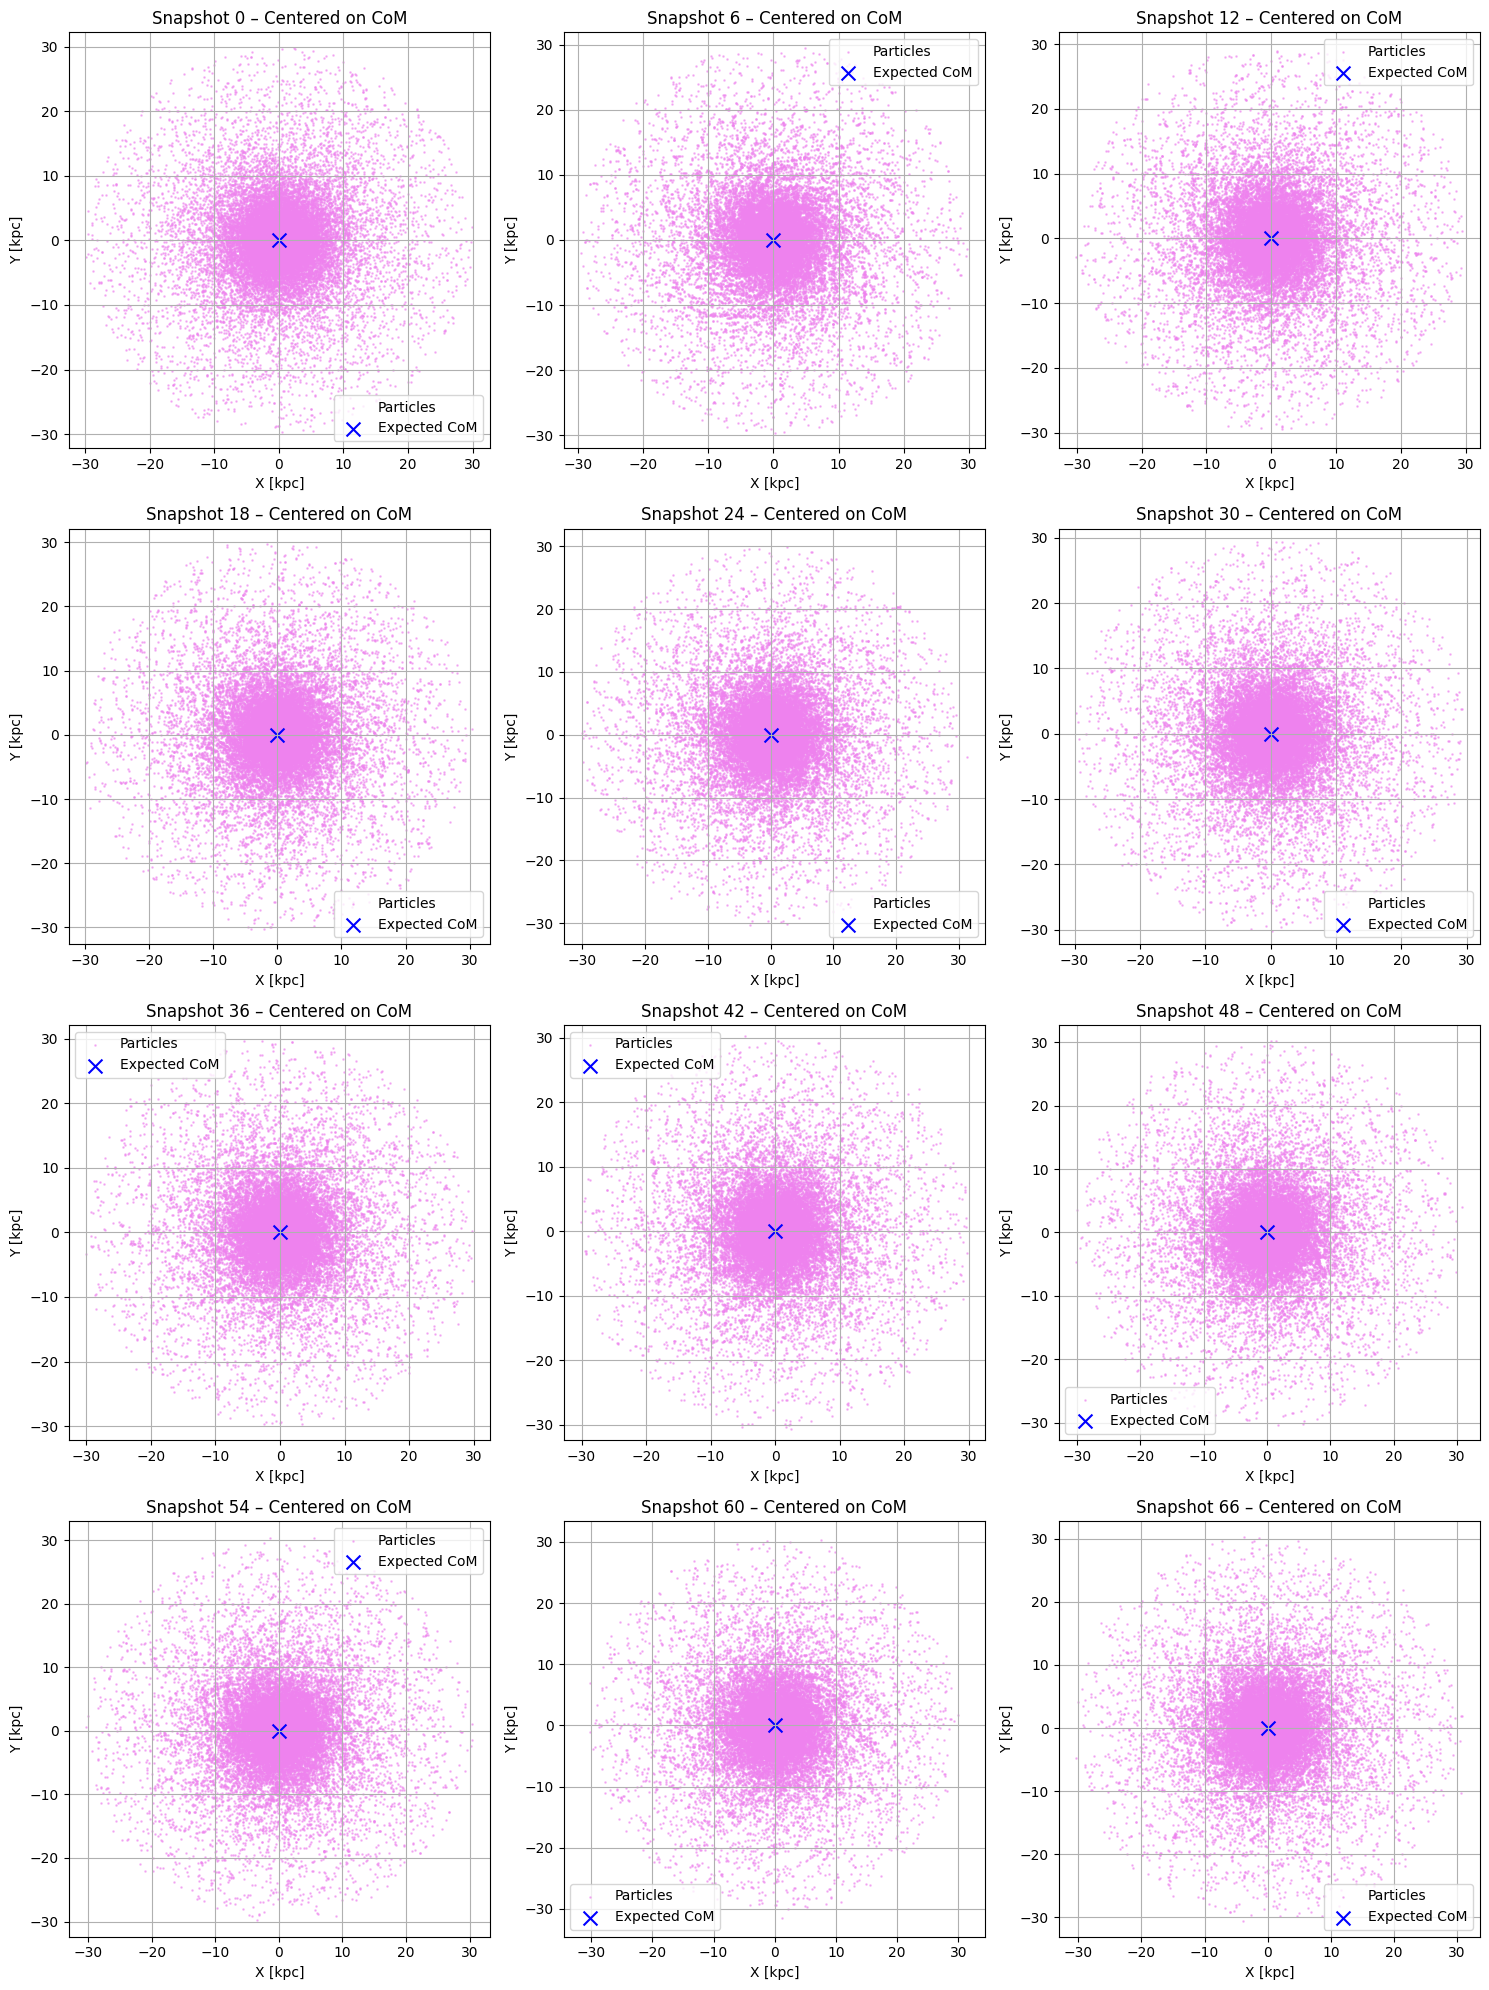

In [17]:
# Select snapshots at regular intervals
selected_snapshots = np.arange(0, Nsnapshots, 6)

# Determine grid size (3 plots per row)
n_rows = len(selected_snapshots) // 3 + (1 if len(selected_snapshots) % 3 != 0 else 0)
n_cols = 3

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

for ax, snapshot_index in zip(axes.flat, selected_snapshots):
    # Plot particle positions (already centered on CoM)
    ax.scatter(
        x_no_cm[snapshot_index, :, 0], 
        x_no_cm[snapshot_index, :, 1], 
        s=0.8, 
        alpha=0.5, 
        color='violet', 
        label='Particles'
    )
    
    # Mark the origin (expected CoM)
    ax.scatter(
        0, 0, 
        color='blue', 
        label='Expected CoM', 
        marker='x', 
        s=100
    )
    
    ax.set_xlabel("X [kpc]")
    ax.set_ylabel("Y [kpc]")
    ax.set_title(f"Snapshot {snapshot_index} – Centered on CoM")
    ax.axis("equal")
    ax.grid(True)
    ax.legend()

# Remove unused subplots if grid is not full
for ax in axes.flat[len(selected_snapshots):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

### Distribution of velocities

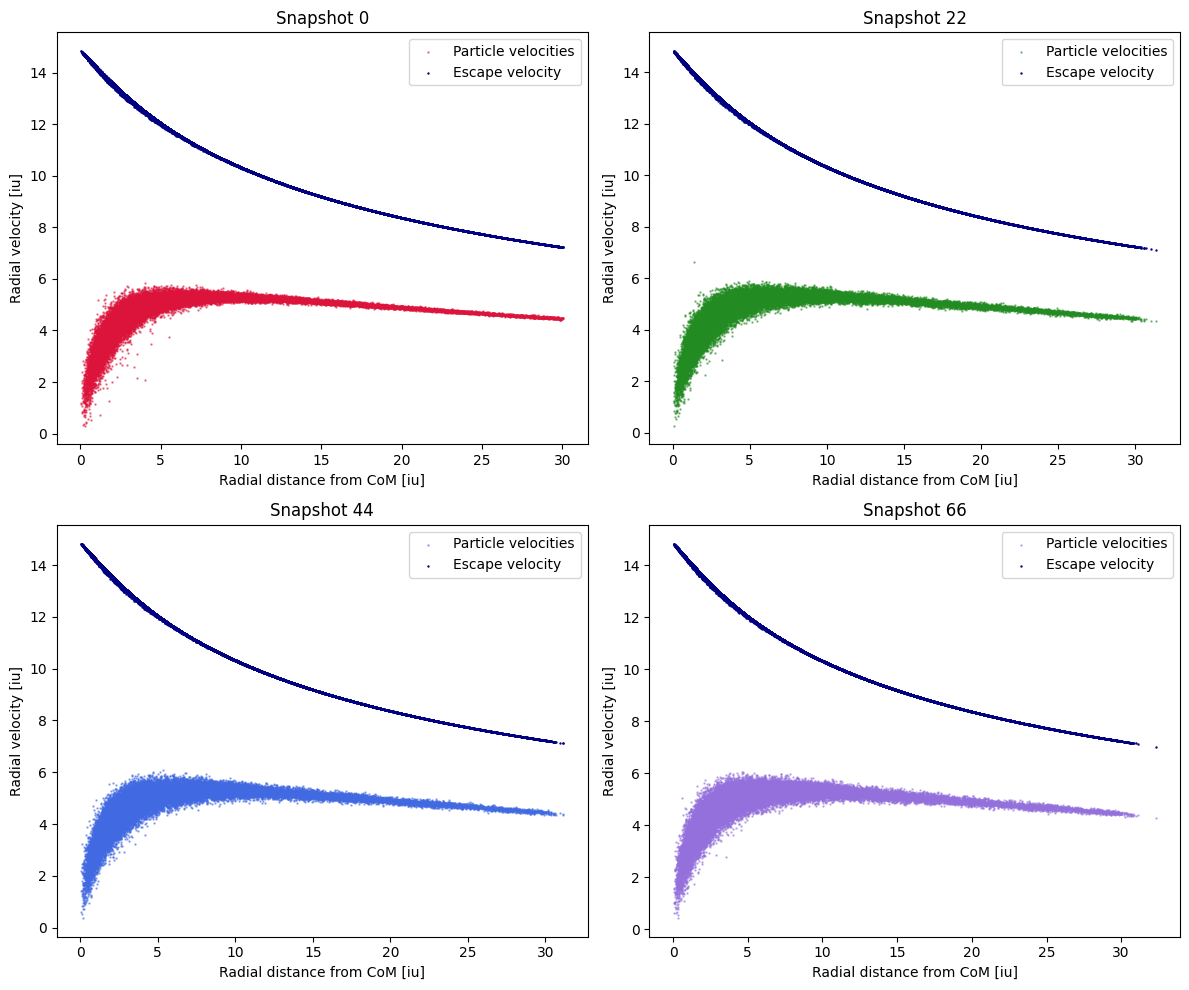

In [18]:
def escape_vel (positions):
    R = (positions[:,0]**2 + positions[:,1]**2)**0.5
    return np.sqrt(-2. *tot_potential(R, positions[:,2]))

v_esc = []
for i in range(len(t)):
    v_esc.append(escape_vel(x_no_cm[i,:,:]))

# Convert escape velocities to numpy array if not already
v_esc = np.array(v_esc)

# Create subplots (2 rows × 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Choose 4 representative snapshots equally spaced in time
indexes = np.linspace(0, len(t) - 1, 4, dtype=int)

# Define a list of colors and titles for clarity
colors = ['crimson', 'forestgreen', 'royalblue', 'mediumpurple']
titles = [f'Snapshot {i}' for i in indexes]

# Plot each snapshot
for i, ax in enumerate(axs.flat):
    idx = indexes[i]
    
    # Plot particle radial velocities
    ax.scatter(
        r_no_cm[idx], vr_no_cm[idx],
        color=colors[i], alpha=0.5, s=0.6,
        label='Particle velocities'
    )
    
    # Plot escape velocity curve
    ax.scatter(
        r_no_cm[idx], v_esc[idx],
        color='navy', s=0.5,
        label='Escape velocity'
    )
    
    # Axis settings
    ax.set_title(titles[i])
    ax.set_xlabel('Radial distance from CoM [iu]')
    ax.set_ylabel('Radial velocity [iu]')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()  

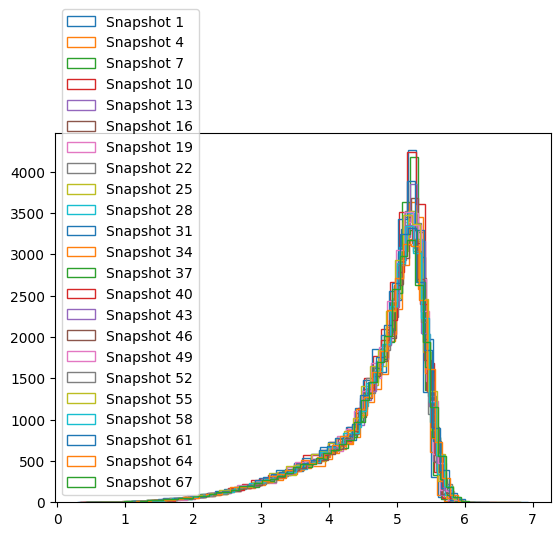

In [19]:
for i in range(0, len(t), 3):  # Incrementing by 3
    plt.hist(vr_no_cm[i, :], 50, histtype='step', label=f'Snapshot {i+1}')

plt.legend()
plt.show()

### Lagrangian radii

(67, 30000, 3) (67, 30000, 3)


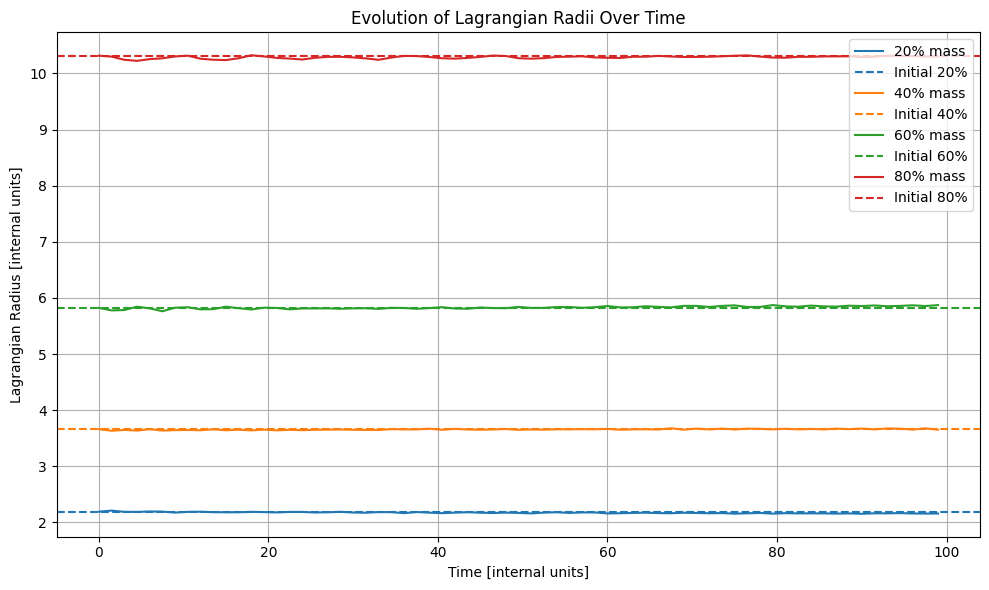

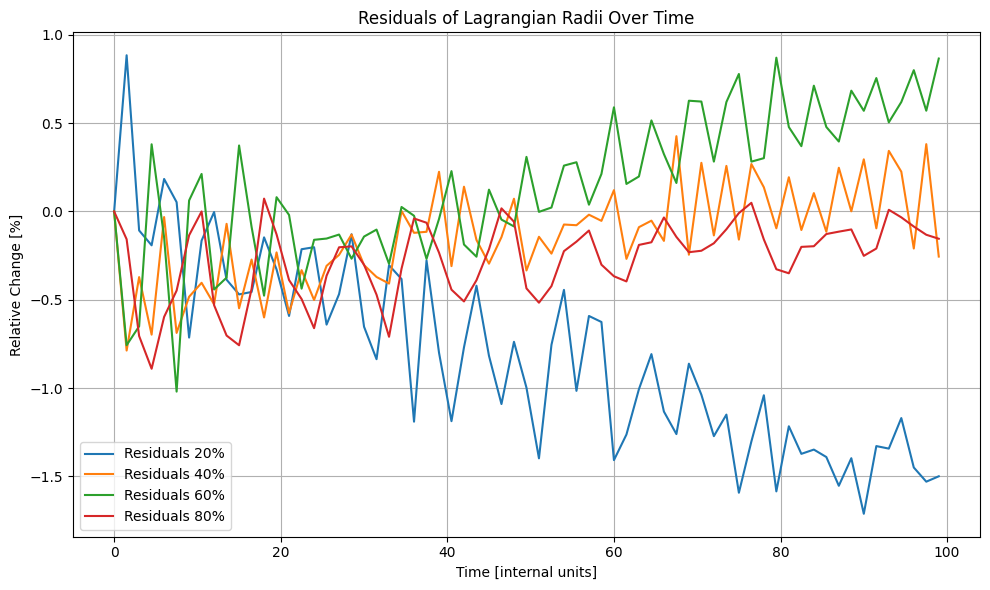

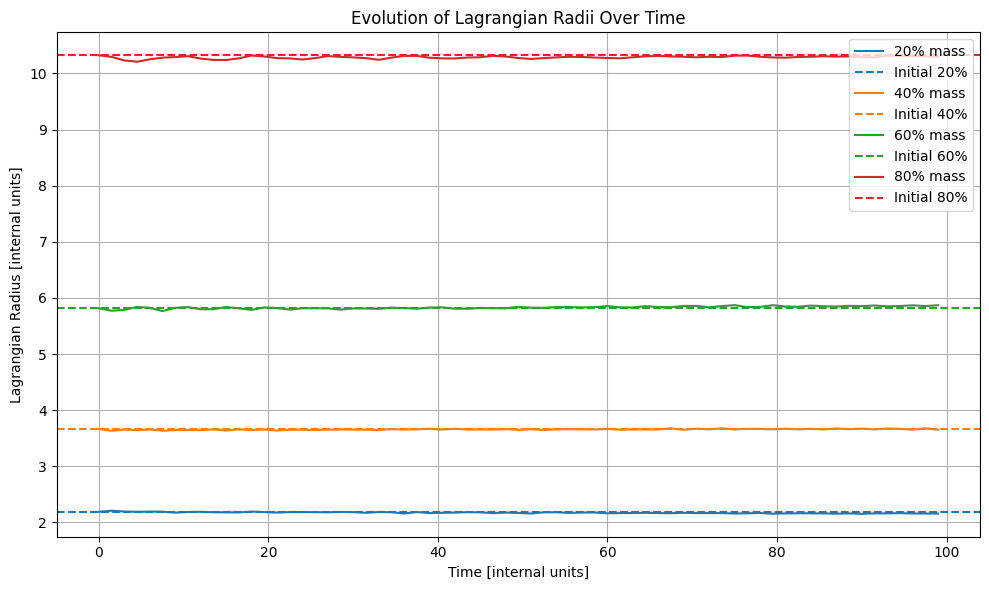

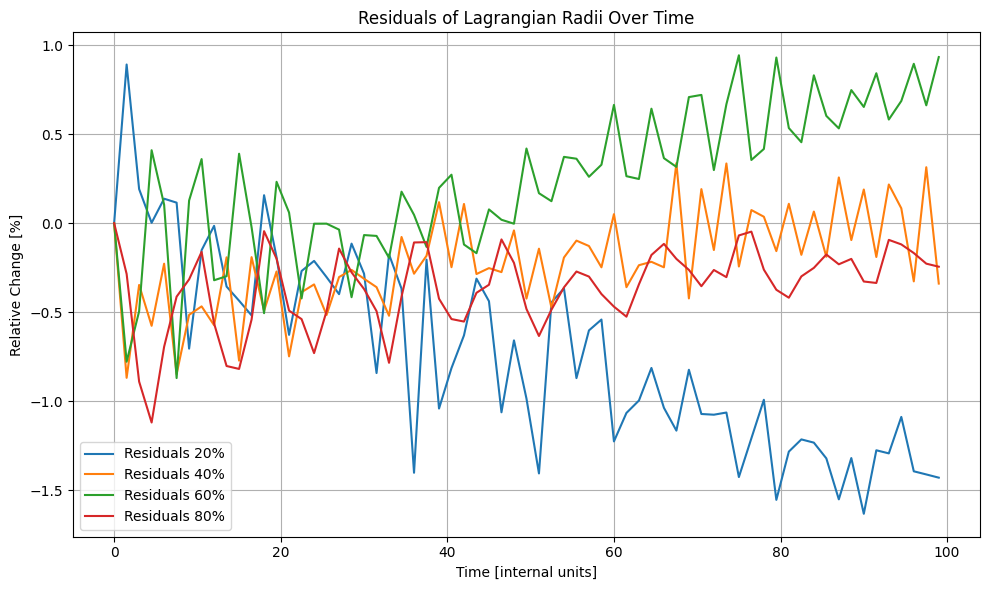

In [20]:
def lagr_radii(masses, positions, times, percentages=[0.2, 0.4, 0.6, 0.8]):
    """
    Compute and plot Lagrangian radii and their percentage residuals over time.

    Parameters:
    - masses: 1D array of particle masses
    - positions: 3D array with shape (timesteps, particles, 3)
    - times: array of time values
    - percentages: list of fractional mass values to define Lagrangian radii
    """

    # Compute radial distances for all particles at all timesteps
    radii = np.sqrt(np.sum(positions**2, axis=2))  # Shape: (timesteps, particles)

    # Sort particles by radius at each timestep
    sorted_indices = np.argsort(radii, axis=1)
    sorted_masses = np.take_along_axis(np.broadcast_to(masses, radii.shape), sorted_indices, axis=1)
    sorted_radii = np.take_along_axis(radii, sorted_indices, axis=1)

    # Compute cumulative mass fraction
    cumulative_mass = np.cumsum(sorted_masses, axis=1)
    total_mass = cumulative_mass[:, -1][:, np.newaxis]
    fractional_mass = cumulative_mass / total_mass

    # Initialize Lagrangian radii array
    lagrangian_radii = np.zeros((len(times), len(percentages)))

    # Extract Lagrangian radius for each mass fraction
    for i, p in enumerate(percentages):
        lagrangian_radii[:, i] = np.array([
            sorted_radii[j][fractional_mass[j] >= p][0] for j in range(len(times))
        ])

    # Plot Lagrangian radii over time
    plt.figure(figsize=(10, 6))
    for i, p in enumerate(percentages):
        line, = plt.plot(times, lagrangian_radii[:, i], label=f"{int(p * 100)}% mass")
        plt.axhline(
            y=lagrangian_radii[0, i],
            linestyle='--',
            color=line.get_color(),
            label=f"Initial {int(p * 100)}%"
        )
    plt.xlabel("Time [internal units]")
    plt.ylabel("Lagrangian Radius [internal units]")
    plt.title("Evolution of Lagrangian Radii Over Time")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("Lagrangian_radii_eq.png", dpi=300, bbox_inches="tight")
    plt.show()

    # Plot residuals (percentual change from initial value)
    plt.figure(figsize=(10, 6))
    for i, p in enumerate(percentages):
        residuals = lagrangian_radii[:, i] - lagrangian_radii[0, i]
        plt.plot(
            times,
            100 * residuals / lagrangian_radii[0, i],
            label=f"Residuals {int(p * 100)}%"
        )
    plt.xlabel("Time [internal units]")
    plt.ylabel("Relative Change [%]")
    plt.title("Residuals of Lagrangian Radii Over Time")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("Lagrangian_radii_res_eq.png", dpi=300, bbox_inches="tight")
    plt.show()

    return lagrangian_radii

print(positions_no_cm.shape, x.shape)
lagrag_r = lagr_radii(masses, x, t)
lagrag_r_no_cm= lagr_radii(masses, positions_no_cm, t)

In [21]:
from scipy.integrate import trapezoid

def rho_D(R, z, a=a, b=b):
        sqrt_zb = np.sqrt(z**2 + b**2)
        num = b**2*M_D*(a*R**2 + (a + 3*sqrt_zb)*(a + sqrt_zb)**2)
        den = 4*np.pi*(R**2 + (a + sqrt_zb)**2)**(5/2)*(z**2 + b**2)**(3/2)
        return num / den
def Sigma(R_values, M_D, z_max=5):
    """
    Compute the surface density profile Σ(R) by integrating the volume density ρ_D(R, z)
    along the vertical direction (z-axis) for each radial position R.

    Parameters:
    - R_values: array-like, radial positions at which to evaluate Σ(R)
    - M_D: float, disk mass (used by rho_D)
    - z_max: float, upper limit of the z integration (default: 5)

    Returns:
    - Sigma_values: array of surface densities corresponding to each R
    """    
    Sigma_values = np.zeros_like(R_values)

    # Perform vertical integration of ρ_D from z = 0 to z = z_max
    for i, R in enumerate(R_values):
        z_vals = np.linspace(0, z_max, 100)
        integrand = [rho_D(R, z) for z in z_vals]
        Sigma_values[i] = 2*np.trapezoid(integrand, dx=z_max / 100)  # Multiply by 2 for symmetry about the disk midplane

    return Sigma_values    

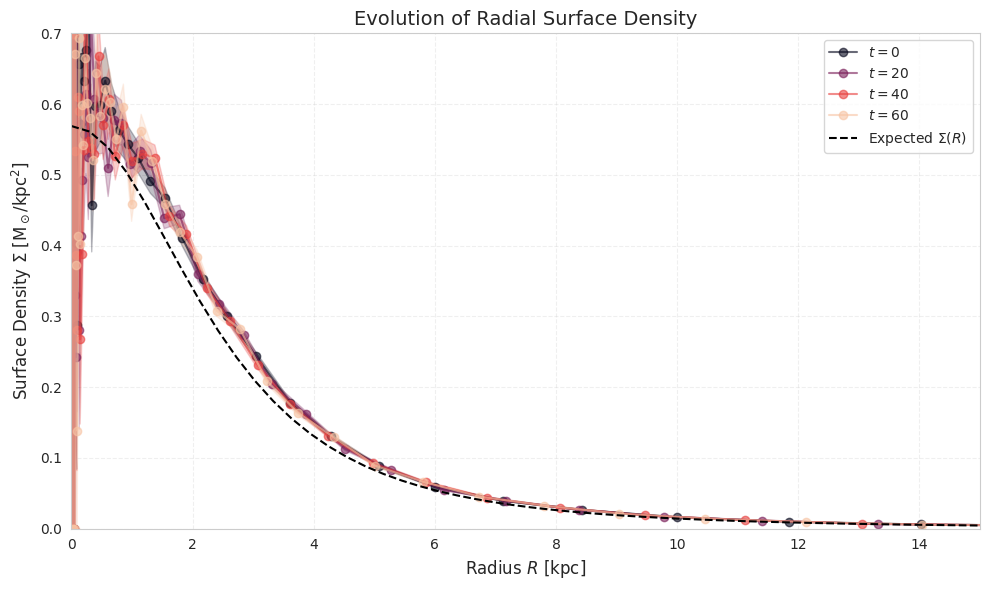

In [22]:
def surface_density_R(masses, positions, num_bins):
    """
    Estimate the radial surface density profile from particle data.

    Parameters:
    - masses: array of particle masses
    - positions: (N, 3) array of particle positions
    - num_bins: number of radial bins for the histogram

    Returns:
    - bin_centers: array of radial bin centers
    - surface_density: estimated Σ(R)
    - poisson_errors: Poissonian uncertainties in each bin
    """
    x, y = positions[:, 0], positions[:, 1]
    R = np.sqrt(x**2 + y**2)

    bins = np.geomspace(R.min(), R.max(), num_bins)
    mass_in_bins, bin_edges = np.histogram(R, bins=bins, weights=masses)

    bin_areas = np.pi * (bin_edges[1:]**2 - bin_edges[:-1]**2)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    surface_density = mass_in_bins / bin_areas
    poisson_errors = np.sqrt(mass_in_bins / masses[0]) * masses[0] / bin_areas

    return bin_centers, surface_density, poisson_errors

# Grid for the theoretical model
R_grid = np.linspace(0, 30, 100)

# Set visual style
sns.set_style('whitegrid')
colors = sns.color_palette("rocket", len(t))  # use a perceptually uniform palette

# Plot experimental surface density at multiple times
plt.figure(figsize=(10, 6))

for i in np.arange(0, len(t), 20):
    bin_centers_R, surface_density_R_exp, poissonian_error = surface_density_R(masses, x[i, :, :], 50)
    
    plt.plot(bin_centers_R, surface_density_R_exp, label=f"$t = {i}$", marker='o', color=colors[i], alpha=0.6)
    plt.fill_between(bin_centers_R,
                     surface_density_R_exp - poissonian_error,
                     surface_density_R_exp + poissonian_error,
                     color=colors[i], alpha=0.25)

# Plot expected theoretical profile
plt.plot(R_grid, Sigma(R_grid, M_D), '--', color='black', linewidth=1.5, label=r'Expected $\Sigma(R)$')

# Final plot adjustments
plt.xlabel(r"Radius $R$ [kpc]", fontsize=12)
plt.ylabel(r"Surface Density $\Sigma$ [M$_\odot$/kpc$^2$]", fontsize=12)
plt.xlim(0, 15)
plt.ylim(0, 0.7)
plt.legend()
plt.title("Evolution of Radial Surface Density", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

7


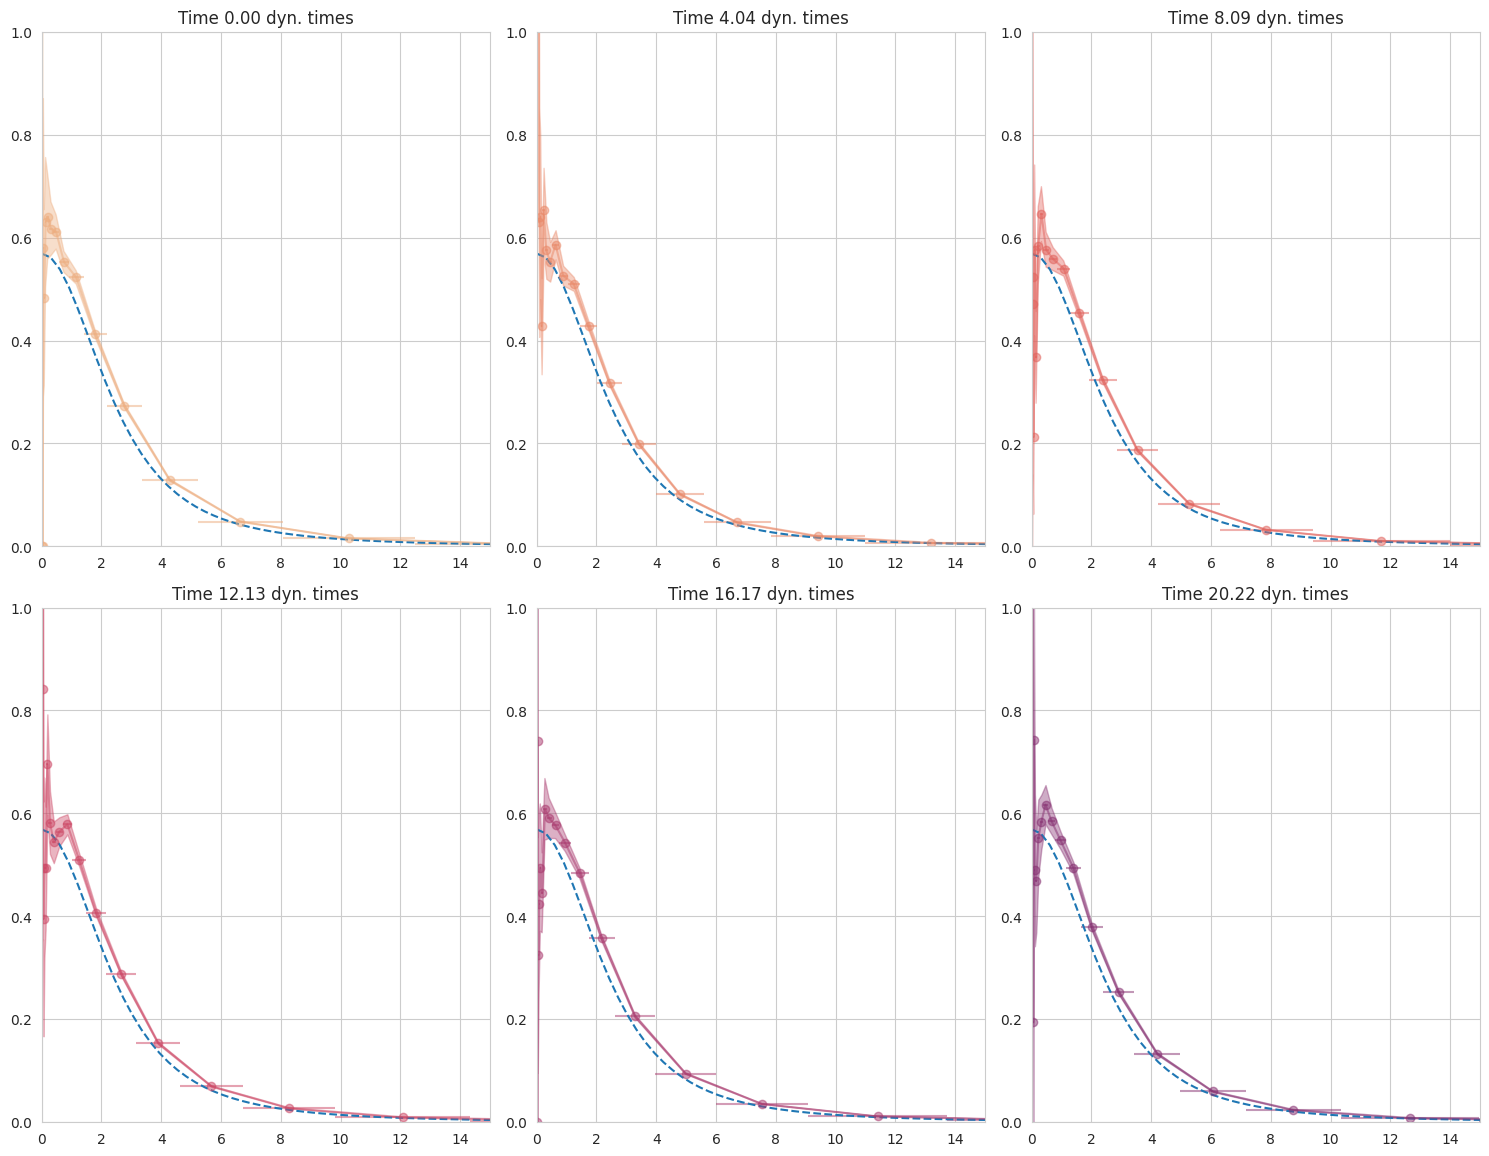

In [23]:
def surface_density_R(masses, positions, num_bins):
    x, y = positions[:, 0], positions[:, 1]
    R = np.sqrt(x**2 + y**2)
    bins = np.geomspace(R.min(), R.max(), num_bins)
    mass_in_bins, bin_edges = np.histogram(R, bins=bins, weights=masses)

    bin_areas = np.zeros(num_bins-1)
    bin_centers = np.zeros(num_bins-1)

    for i in range(len(bin_areas)):
        bin_areas[i] = np.pi * (bin_edges[i+1]**2 - bin_edges[i]**2)
        bin_centers[i] = 0.5 * (bin_edges[i+1] + bin_edges[i])

    surface_density = mass_in_bins / bin_areas
    poisson_errors = np.sqrt(mass_in_bins/masses[0])*masses[0]/ bin_areas  # Assuming mass_in_bins is integer count


    return bin_centers, surface_density, poisson_errors, bin_edges
 
R_grid = np.linspace(0, 30, 100)

sns.set_style('whitegrid')
colors = sns.color_palette("flare", len(t))

# Create a grid of subplots
n_rows = len(t) // 10 + (1 if len(t) % 10 != 0 else 0)
print(n_rows)
fig, axes = plt.subplots(int(n_rows / 3), 3, figsize=(15, 5 * n_rows/3))

for i, ax in zip(np.arange(0, len(t), 10), axes.flat):


    bin_centers_R, surface_density_R_exp, poissonian_error, bin_edges= surface_density_R(masses,x[i, :, :], 20)
    bin_err = np.diff(bin_edges)/2
    ax.errorbar(bin_centers_R, surface_density_R_exp, xerr= bin_err, marker='o', color = colors[i] , alpha=0.5, label='calculated Sigma')
    #ax.plot(bin_centers_R, surface_density_R_exp, marker='o', color=colors[i], alpha=0.5)
    ax.fill_between(bin_centers_R, surface_density_R_exp - poissonian_error, surface_density_R_exp + poissonian_error, color=colors[i], alpha=0.4)
    ax.set_xlim(0, 15)
    ax.set_ylim(0, 1)
    ax.set_title(f"Time {i/t_dyn:.2f} dyn. times")
    ax.grid(True)

# Plot expected Sigma curve on each subplot
for ax in axes.flat:
    ax.plot(R_grid, Sigma(R_grid, M_D), '--', label='expected Sigma')

plt.tight_layout()
plt.show()

### Fourier Analysis of the Bar

In this section, we typically perform a Fourier decomposition of the surface density to quantify the formation of a galactic bar — especially the $m=2$ mode that indicates a bar-like structure.

However, in this equilibrium configuration:

The disk is marginally stable (Toomre $Q > 1$).

No significant perturbation has been applied.

No strong $m=2$ mode is expected to develop.

In [24]:
num_bins = 50  # Number of bins for the Fourier analysis


def fourier_analysis(R_particles, phi_particles, mass, m=2, n_bins=num_bins):
    R_max = np.max(R_particles)

    R_bins = np.linspace(0, R_max, n_bins + 1)  
    R_centers = 0.5 * (R_bins[:-1] + R_bins[1:])
    A_2 = np.zeros_like(R_centers, dtype=complex)
    theta_bar = np.zeros_like(R_centers, dtype=float)

    for i in range(n_bins):
        in_bin = (R_particles >= R_bins[i]) & (R_particles < R_bins[i + 1])
        if not np.any(in_bin):
            print("bin vuoto", i)
            A_2[i] = np.nan  # No particles in the bin
            theta_bar[i] = np.nan  # No meaningful angle
            continue

        phi_in_bin = phi_particles[in_bin]
        m_i = mass * np.ones_like(phi_in_bin)

        A_2[i] = np.sum(m_i * np.exp(2j * phi_in_bin)) / np.sum(m_i)
        theta_bar[i] = 0.5 * np.angle(A_2[i])

    return R_centers, np.abs(A_2), theta_bar


def cumulative_fourier_analysis(R_particles, phi_particles, mass, m=2, n_bins=num_bins):
    R_max = np.max(R_particles)

    R_bins = np.linspace(0, R_max, n_bins + 1)  
    R_centers = 0.5 * (R_bins[:-1] + R_bins[1:])
    A_2 = np.zeros_like(R_centers, dtype=float)
    
    for i in range(n_bins):
        in_cumulative = R_particles < R_bins[i + 1]
        if not np.any(in_cumulative):
            A_2[i] = np.nan  # No particles within the cumulative bin
            continue

        phi_in_cumulative = phi_particles[in_cumulative]
        m_i = mass * np.ones_like(phi_in_cumulative)

        A_2_complex = np.sum(m_i * np.exp(2j * phi_in_cumulative)) / np.sum(m_i)
        A_2[i] = np.abs(A_2_complex)

    return R_centers, A_2

In [25]:
# filter: cilinder of r = 5, z = 1
R_cut = 5.0  #
z_cut = 1.0   

# Evolving bar strength over time
n_snapshots = Nsnapshots
bar_strength_evolution = []
cumulative_bar_strength_evolution = []
bar_angle_evolution = []

selected_snapshots = np.arange(0, n_snapshots, 6)
radius_profiles = {}
radius_profiles_cumulative = {}
bar_angle_profiles = {}



colors = sns.color_palette("deep", n_colors=len(selected_snapshots))

for t_i in range(n_snapshots):
    # Snapshot particle data
    R_snapshot = r_no_cm[t_i, :]
    phi_snapshot = np.arctan2(x_no_cm[t_i, :, 1], x_no_cm[t_i, :, 0])
    z_snapshot = x_no_cm[t_i, :, 2] 

    mask = (R_snapshot < R_cut) & (np.abs(z_snapshot) < z_cut) 
    R_snapshot = R_snapshot[mask]
    phi_snapshot = phi_snapshot[mask]
    z_snapshot = z_snapshot[mask]
# -------------------------------------------------------------
    # differential analysis
    R_centers, A2_A0, theta_bar = fourier_analysis(
        R_snapshot, phi_snapshot, masses[0], m=2
    )
    bar_strength_evolution.append(np.max(A2_A0))
# ------------------------------------------------------------------------------
    # cumulative analysis
    R_centers_cumulative, A2_cumulative = cumulative_fourier_analysis(
        R_snapshot, phi_snapshot, masses[0], m=2
    )
    cumulative_bar_strength_evolution.append(np.max(A2_cumulative))
# -------------------------------------------------------------------------------
    # Bar angle evolution
    radius_limit = 5.0
    within_limit = R_centers < radius_limit
    mean_bar_angle = (
        np.mean(theta_bar[within_limit]) if np.any(within_limit) else np.nan
    )
    bar_angle_evolution.append(mean_bar_angle)

    # Save profiles for plotting
    if t_i in selected_snapshots:
        radius_profiles[t_i] = (R_centers, A2_A0)
        radius_profiles_cumulative[t_i] = (R_centers_cumulative, A2_cumulative)
        bar_angle_profiles[t_i] = (R_centers, theta_bar)

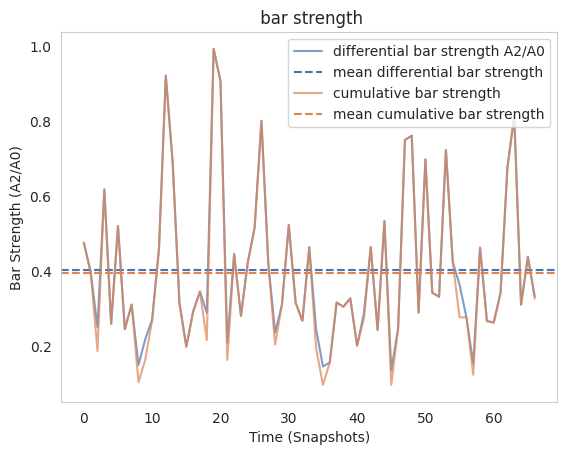

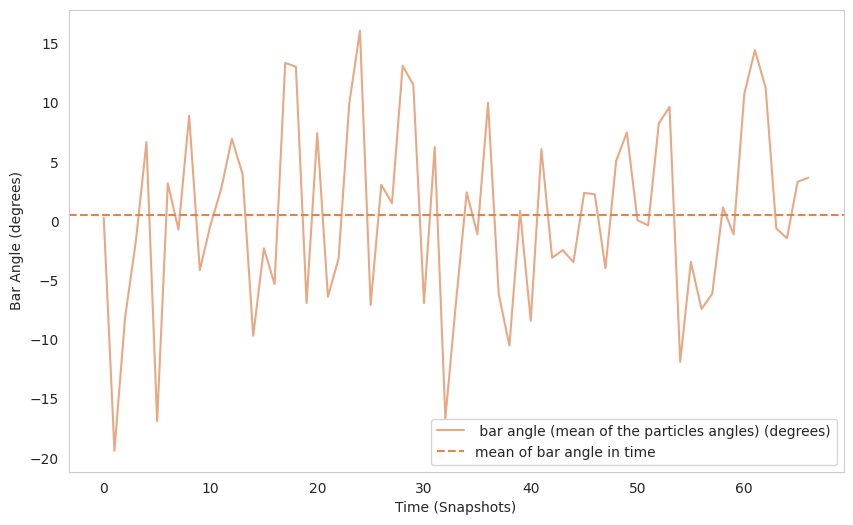

[np.float64(0.47675227940811576), np.float64(0.3993347641752273), np.float64(0.25205159314701486), np.float64(0.6186363824374863), np.float64(0.2612133627286684), np.float64(0.5211771702982992), np.float64(0.2469291585687056), np.float64(0.3121516730062205), np.float64(0.1515357700045545), np.float64(0.22054701594495454), np.float64(0.2719669307268936), np.float64(0.4607185213644293), np.float64(0.9213184524418468), np.float64(0.6909526877900439), np.float64(0.3156942941840092), np.float64(0.20039086316658464), np.float64(0.29340779298306163), np.float64(0.3465357141875866), np.float64(0.290459121189283), np.float64(0.9923710506377226), np.float64(0.9071418729196442), np.float64(0.21153524132945492), np.float64(0.4470211736769506), np.float64(0.2822028329170387), np.float64(0.42407240304057925), np.float64(0.51678336767048), np.float64(0.8012048735666776), np.float64(0.4225260671944553), np.float64(0.23782714297015017), np.float64(0.31160108495859895), np.float64(0.5239945373928396), n

In [26]:
# Plot bar strength evolution
time_steps = np.arange(len(bar_strength_evolution))
plt.plot(time_steps, bar_strength_evolution, label="differential bar strength A2/A0", color=colors[0], alpha=0.7)
plt.axhline(y=np.mean(bar_strength_evolution), color=colors[0], linestyle="--", label="mean differential bar strength")

plt.plot(time_steps, cumulative_bar_strength_evolution, label="cumulative bar strength", color=colors[1], alpha=0.7)
plt.axhline(y=np.mean(cumulative_bar_strength_evolution), color=colors[1], linestyle="--", label="mean cumulative bar strength")

plt.xlabel("Time (Snapshots)")
plt.ylabel("Bar Strength (A2/A0)")
plt.title(" bar strength")
plt.legend()
plt.grid()
plt.savefig("bar_strength_eq.png", dpi=300, bbox_inches="tight")
plt.show()

# Plot bar angle evolution
plt.figure(figsize=(10, 6))
plt.plot(
    time_steps,
    np.degrees(bar_angle_evolution),
    label=" bar angle (mean of the particles angles) (degrees)",
    color=colors[1],
    alpha=0.7,
)
plt.axhline(
    y=np.degrees(np.nanmean(bar_angle_evolution)),
    color=colors[1],
    linestyle="--",
    label="mean of bar angle in time",
)

plt.xlabel("Time (Snapshots)")
plt.ylabel("Bar Angle (degrees)")
plt.legend()
plt.grid()
plt.savefig("bar_angle_eq.png", dpi=300, bbox_inches="tight")
plt.show()

print(bar_strength_evolution)

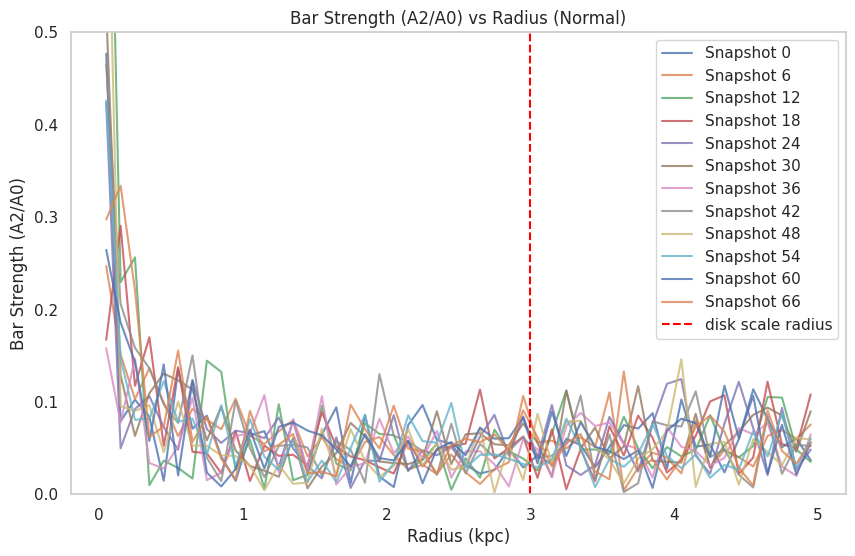

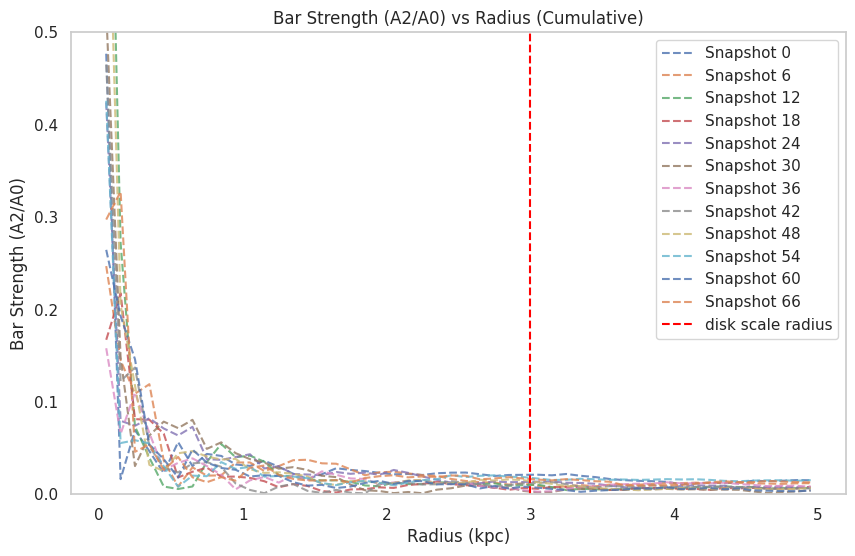

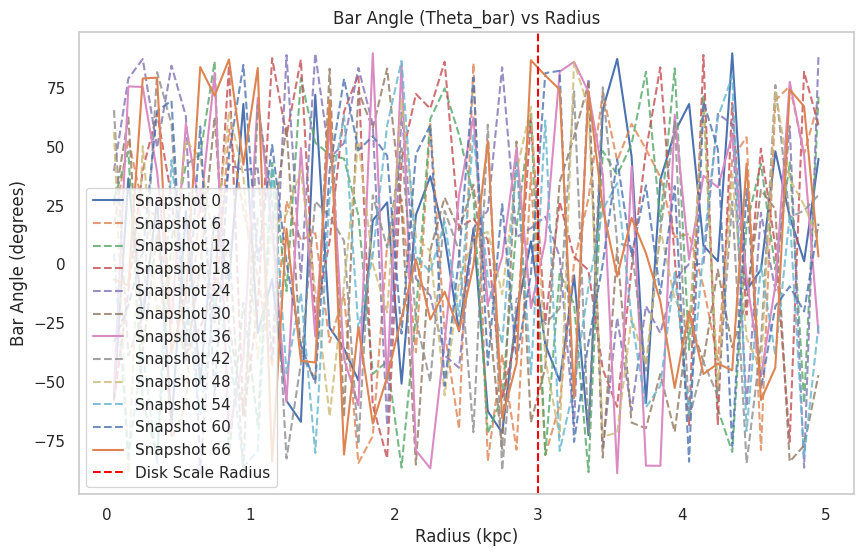

In [27]:
sns.set(style="whitegrid")

colors = sns.color_palette("deep", n_colors=len(selected_snapshots))

plt.figure(figsize=(10, 6))
for t_i, color in zip(selected_snapshots, colors):
    R_centers, A2_A0 = radius_profiles[t_i]
    plt.plot(R_centers, A2_A0, label=f"Snapshot {t_i}", color=color, alpha=0.8)

plt.xlabel("Radius (kpc)")
plt.ylabel("Bar Strength (A2/A0)")
plt.title("Bar Strength (A2/A0) vs Radius (Normal)")
plt.axvline(a, linestyle = '--', c ='red', label = 'disk scale radius')
plt.legend()
plt.ylim(0, 0.5)
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
for t_i, color in zip(selected_snapshots, colors):
    R_centers, A2_cumulative = radius_profiles_cumulative[t_i]
    
    
    plt.plot(R_centers, A2_cumulative, label=f"Snapshot {t_i}", color=color, linestyle='--', alpha=0.8)

plt.xlabel("Radius (kpc)")
plt.ylabel("Bar Strength (A2/A0)")
plt.title("Bar Strength (A2/A0) vs Radius (Cumulative)")
plt.axvline(a, linestyle ='--', c ='red', label = 'disk scale radius')

plt.legend()
plt.ylim(0, 0.5)
plt.grid()
plt.show()


# Use fewer snapshots for the bar angle plot, highlight key snapshots
highlight_snapshots = [selected_snapshots[0],  # First
                       selected_snapshots[len(selected_snapshots) // 2],  # Middle
                       selected_snapshots[-1]]  # Last

colors_angle = sns.color_palette("deep", n_colors=len(selected_snapshots))

plt.figure(figsize=(10, 6))
for t_i, color in zip(selected_snapshots, colors_angle):
    if t_i in bar_angle_profiles:
        R_centers, theta_bar = bar_angle_profiles[t_i]
        if t_i in highlight_snapshots:
            plt.plot(R_centers, np.degrees(theta_bar), label=f"Snapshot {t_i}", color=color, linewidth=1.5) 
        else:
            plt.plot(R_centers, np.degrees(theta_bar), label=f"Snapshot {t_i}", color=color, linestyle='--', alpha=0.8)

plt.xlabel("Radius (kpc)")
plt.ylabel("Bar Angle (degrees)")
plt.title("Bar Angle (Theta_bar) vs Radius")
plt.axvline(a, linestyle='--', c='red', label='Disk Scale Radius')
plt.legend()
plt.grid()
plt.show()

## Energy Analysis

In [28]:
def parse_nbody_output(filename):
    """
    Parse the N-body simulation output file with precise column parsing.
    
    Parameters:
    -----------
    filename : str
        Path to the output text file
    
    Returns:
    --------
    dict of pd.DataFrame
        Parsed simulation output data with separate DataFrames for different sections
    """
    # Initialize data storage
    simulation_params = {}
    time_series_data = []
    
    # Open and read the file
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    # Parse simulation parameters (first two lines)
    param_headers = lines[0].strip().split()[1:]
    param_values = lines[1].strip().split()[1:]
    simulation_params = dict(zip(param_headers, param_values))
    
    # Regular expressions for parsing precise columns
    time_series_regex = re.compile(r'^(\s*\d+\.\d{3})\s*(\d+\.\d{5})\s*(\d+\.\d{5})\s*(\d+\.\d{5})\s*(-?\d+\.\d{5})\s*(\d+\.\d{5})\s*(\d+\.\d{5})\s*(\d+\.\d{3})$')
     
    # Parse time series data
    for line in lines:
        match = time_series_regex.match(line.strip())
        if match:
            # Convert matched groups to float
            time_series_entry = [float(x) for x in match.groups()]
            time_series_data.append(time_series_entry)
    
    # Create DataFrame for time series
    time_series_df = pd.DataFrame(time_series_data, columns=[
        'time', '|T+U|', 'T', '-U', '-T/U', '|Vcom|', '|Jtot|', 'CPUtot'
    ])
    
    return {
        'simulation_params': simulation_params,
        'time_series': time_series_df
    }

In [29]:
filepath = 'output_EQUILIBRIUM_1.txt'
result = parse_nbody_output(filepath)

In [30]:
#result.keys()
result['time_series']

time      |T+U|          T         -U     -T/U   |Vcom|      |Jtot|  \
0        0.000  294.70972  395.29684  100.58711  3.92990  0.56634  1207.60669   
1        0.005  294.71036  395.29803  100.58767  3.92989  0.56636  1207.60547   
2        0.010  294.70917  395.29764  100.58848  3.92985  0.56636  1207.60242   
3        0.015  294.70911  395.29922  100.59013  3.92980  0.56636  1207.60156   
4        0.020  294.70834  395.29999  100.59164  3.92975  0.56634  1207.60205   
...        ...        ...        ...        ...      ...      ...         ...   
20000   99.985  293.88580  394.52646  100.64065  3.92015  0.03043  1207.70386   
20001   99.990  293.88690  394.52771  100.64081  3.92016  0.03042  1207.70337   
20002   99.995  293.88620  394.52805  100.64185  3.92012  0.03041  1207.70312   
20003  100.000  293.88666  394.52972  100.64307  3.92009  0.03041  1207.70264   
20004  100.005  293.88782  394.53125  100.64344  3.92009  0.03040  1207.70093   

        CPUtot  
0        0.014  
1        0.030  
2        0.044  
3        0.057  
4        0.070  
...        ...  
20000  260.956  
20001  260.968  
20002  260.981  
20003  260.992  
20004  261.004  

[20005 rows x 8 columns]

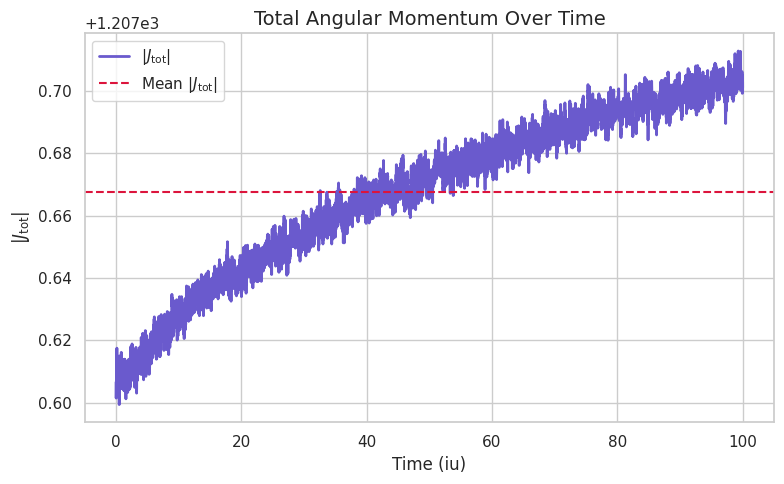

In [31]:
# Plot of total angular momentum over time

# Import seaborn style for a cleaner look
import seaborn as sns
sns.set(style="whitegrid")

# Extract data
time = result['time_series']['time']
Jtot = result['time_series']['|Jtot|']
Jtot_mean = np.mean(Jtot)

# Plot total angular momentum
plt.figure(figsize=(8, 5))
plt.plot(time, Jtot, label=r"$|J_{\mathrm{tot}}|$", color='slateblue', linewidth=2)
plt.axhline(y=Jtot_mean, color='crimson', linestyle='--', linewidth=1.5, label=r"Mean $|J_{\mathrm{tot}}|$")

# Axis labels and title
plt.xlabel("Time (iu)", fontsize=12)
plt.ylabel(r"$|J_{\mathrm{tot}}|$", fontsize=12)
plt.title("Total Angular Momentum Over Time", fontsize=14)

# Legend and layout
plt.legend()
plt.tight_layout()
plt.savefig("angular_momentum_eq.png", dpi=300, bbox_inches="tight")
plt.show()

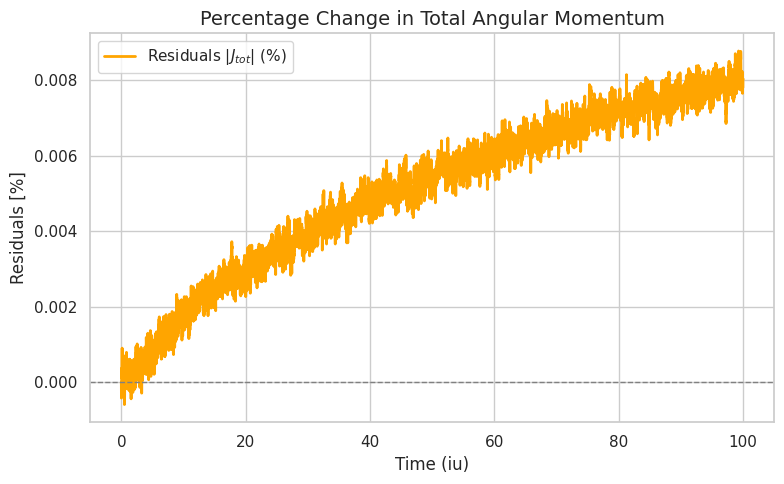

The angular momentum changes by approximately: 0.0094%


In [32]:
# Compute percentage residuals of total angular momentum compared to initial value
residuals_L_perc = 100 * (
    result['time_series']['|Jtot|'] - result['time_series']['|Jtot|'].iloc[0]
) / result['time_series']['|Jtot|'].iloc[0]

# Plot residuals over time
plt.figure(figsize=(8, 5))
plt.plot(result['time_series']['time'], residuals_L_perc, color='orange', linewidth=2, label="Residuals $|J_{tot}|$ (%)")

# Axes labels and title
plt.xlabel("Time (iu)", fontsize=12)
plt.ylabel("Residuals [%]", fontsize=12)
plt.title("Percentage Change in Total Angular Momentum", fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
plt.show()

# Print the total percentage change over the simulation
max_change = (np.max(result['time_series']['|Jtot|']) - np.min(result['time_series']['|Jtot|'])) * 100 / np.mean(result['time_series']['|Jtot|'])
print(f"The angular momentum changes by approximately: {max_change:.4f}%")

## Conservation of Angular Momentum: Focus on the \( z \)-Component

In our disk model, which is symmetric about the \( z \)-axis, only the **\( z \)-component** of the total angular momentum should be conserved.

---

### Angular Momentum of a Single Particle

The angular momentum of a single particle \( i \) is defined as:

$$
\mathbf{L}_i = \mathbf{r}_i \times m_i \mathbf{v}_i
$$

Where:
- \( \mathbf{r}_i = (x_i, y_i, z_i) \) is the position vector
- \( \mathbf{v}_i = (v_{x,i}, v_{y,i}, v_{z,i}) \) is the velocity vector

The cross product \( \mathbf{r}_i \times \mathbf{v}_i \) gives:

$$
\mathbf{L}_i = \left( y_i v_{z,i} - z_i v_{y,i} \right) \hat{i} - \left( x_i v_{z,i} - z_i v_{x,i} \right) \hat{j} + \left( x_i v_{y,i} - y_i v_{x,i} \right) \hat{k}
$$

Thus, the \( z \)-component (relevant for a rotating disk) is:

$$
L_{z,i} = m_i (x_i v_{y,i} - y_i v_{x,i})
$$

---

### Total Angular Momentum Along \( z \)-Axis

To compute the total angular momentum of the entire system along the \( z \)-axis:

$$
L_z = \sum_{i=1}^{N} m_i (x_i v_{y,i} - y_i v_{x,i})
$$

This is the only component we expect to be conserved due to the disk's symmetry.

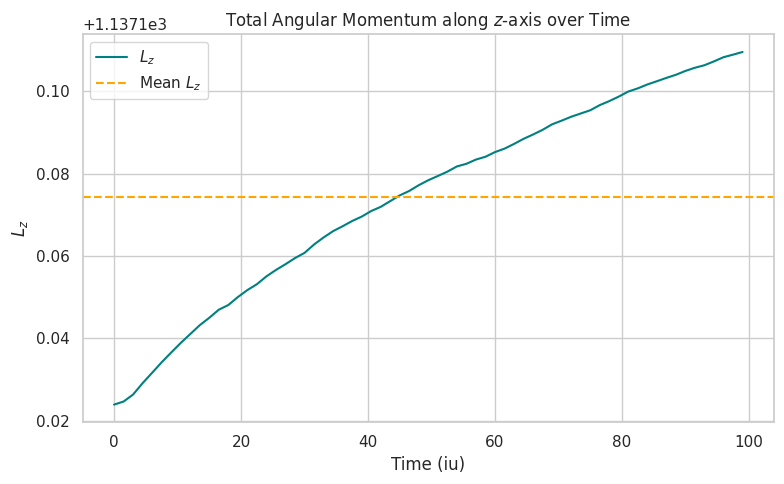

Relative variation in $L_z$: 0.008%


In [33]:
# --- Angular Momentum Analysis (Lz component only) ---

# Initialize array to store angular momentum along z at each snapshot
L_z = np.zeros(len(t))

# Loop over time snapshots to compute Lz
for i in range(len(t)):
    # Compute the z-component of angular momentum using the cross product formula
    L_z[i] = np.sum(masses * (x[i, :, 0] * v[i, :, 1] - x[i, :, 1] * v[i, :, 0]))

# Plot the evolution of Lz over time
plt.figure(figsize=(8, 5))
plt.plot(t, L_z, label=r"$L_z$", color='teal', linewidth=1.5)
plt.axhline(np.mean(L_z), linestyle='--', color='orange', label='Mean $L_z$')

plt.xlabel("Time (iu)")
plt.ylabel(r"$L_z$")
plt.title("Total Angular Momentum along $z$-axis over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute and print relative variation in Lz
relative_variation = (np.max(L_z) - np.min(L_z)) * 100 / np.mean(L_z)
print(f"Relative variation in $L_z$: {relative_variation:.3f}%")


Total static halo potential energy: -1.51188e+05


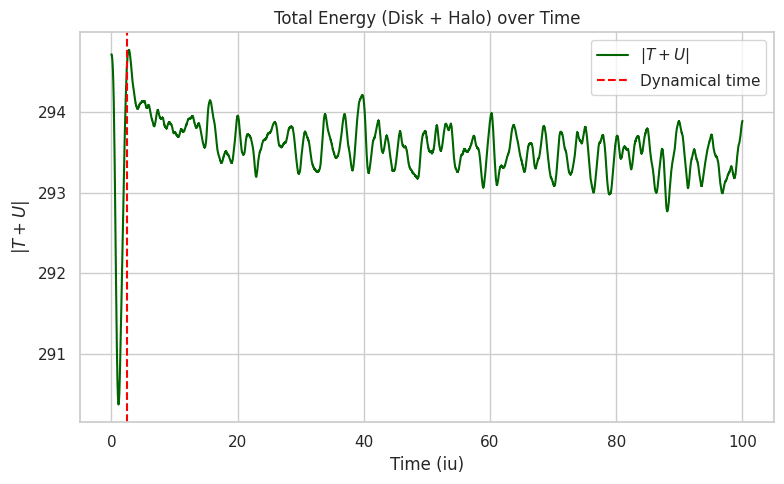

In [34]:
# --- Total Energy Conservation Check (|T + U|) ---

# Define the static Hernquist potential
def pot_halo_tot(r, a_H):
    return -G * M_H / (r + a_H)

# Compute the total potential energy contribution from the halo
pot_halo_total = pot_halo_tot(raggi, a_H)
total_potential_energy_halo = np.sum(pot_halo_total * masses[0])  # Since all masses are equal

# Print the total static potential energy
print(f"Total static halo potential energy: {total_potential_energy_halo:.5e}")

# Extract the time evolution of the total energy |T + U| from the treecode output
t_u_disk = result['time_series']['|T+U|']

# Plot |T + U| over time to assess energy conservation
plt.figure(figsize=(8, 5))
plt.plot(result['time_series']['time'], t_u_disk, label=r"$|T + U|$", color='darkgreen', linewidth=1.5)

# Mark the dynamical timescale for reference
plt.axvline(x=t_dyn, color='red', linestyle='--', label='Dynamical time')

plt.xlabel("Time (iu)")
plt.ylabel(r"$|T + U|$")
plt.title("Total Energy (Disk + Halo) over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("tot_energy_eq.png", dpi=300, bbox_inches="tight")
plt.show()

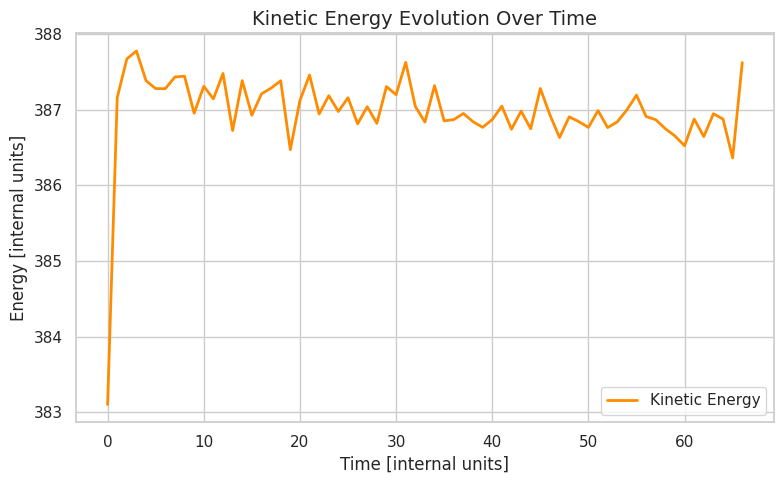

In [130]:
# Time array from 0 to number of snapshots
t = np.arange(0, Nsnapshots, 1)

# Compute total kinetic energy at each snapshot
kinetic_energy = np.zeros(Nsnapshots)

for i in range(Nsnapshots):
    # For each snapshot, sum 1/2 * m * v^2 over all particles
    kinetic_energy[i] = 0.5 * np.sum(masses * np.sum(v[i]**2, axis=1))

# Plotting the total kinetic energy over time
plt.figure(figsize=(8, 5))
plt.plot(t, kinetic_energy, label='Kinetic Energy', color='darkorange', linewidth=2)

plt.xlabel('Time [internal units]', fontsize=12)
plt.ylabel('Energy [internal units]', fontsize=12)
plt.title('Kinetic Energy Evolution Over Time', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [136]:
def pot_energy_halo (positions, m_particle):
    R = (positions[:,0]**2 + positions[:,1]**2)**0.5
    return np.sum(m_particle * potential_halo(R, positions[:,2]))

def pot_energy_halo_tot (positions, m_particle):
    R = (positions[:,0]**2 + positions[:,1]**2)**0.5
    return np.sum(m_particle * pot_halo_tot(R, a_H))


def pot_energy_disk(x, m_particle):
    pot_en = np.zeros(Nsnapshots)
    
    for snapshot in range(Nsnapshots):
        potential_energy = 0
        for i in range(Npart):
            for j in range(i + 1, Npart):  # Evita coppie ridondanti
                r_ij = np.linalg.norm(x[snapshot, i] - x[snapshot, j])
                potential_energy -= (m_particle[i] * m_particle[j]) / r_ij
        pot_en[snapshot] = potential_energy
        
    return pot_en

In [137]:
# Compute the potential energy due to the static Hernquist halo at each timestep
pot_en_halo = np.zeros(x.shape[0])  # Initialize array to store potential energy values

for i in range(x.shape[0]):  # Loop over all snapshots
    pot_en_halo[i] = pot_energy_halo(x[i, :, :], masses[0])  # Compute potential energy at each step

# Alternatively, compute the total potential energy using a pre-defined vectorized version
pot_en_halo_tot = pot_energy_halo_tot(x, masses[0])

# Check consistency between simulation output and our computed timeline
# dtime is the timestep resolution inferred from the output file
dtime = result['time_series']['time'][2] - result['time_series']['time'][1]
tstop = t_stop        # Total simulation time
dtout = 1.5           # Output time interval (used when saving snapshots)

# Print diagnostic information about timesteps and snapshot count
print("Snapshots =", Nsnapshots, 
      "Expected snapshots =", round(tstop / dtout), 
      "Total timesteps =", round(tstop / dtime), 
      "Output interval (dtout) =", dtout, 
      "Timestep size (dtime) =", dtime)

# Match simulation output data (e.g., |T+U|) to the number of snapshots by downsampling
en_disk = t_u_disk[::int(dtout / dtime)]  # Energy of the disk sampled at the same rate as snapshots

Snapshots = 67 Expected snapshots = 67 Total timesteps = 20000 Output interval (dtout) = 1.5 Timestep size (dtime) = 0.005


Halo potential energy (snapshot-based): [-2254.43123919 -2256.72615108 -2257.17965081 -2257.2408671
 -2256.96851605 -2256.87526843 -2256.82702347 -2256.9564911
 -2256.95940319 -2256.56927296 -2256.85540981 -2256.72336436
 -2256.95319633 -2256.35766541 -2256.86683571 -2256.48088045
 -2256.75956017 -2256.79883363 -2256.86405618 -2256.12585669
 -2256.65662806 -2256.93622262 -2256.49903172 -2256.73088506
 -2256.54844255 -2256.68764655 -2256.39041576 -2256.5879286
 -2256.41907531 -2256.82709853 -2256.7133929  -2257.06845579
 -2256.56581291 -2256.42190728 -2256.80698139 -2256.40215173
 -2256.40695804 -2256.44693659 -2256.391495   -2256.28911267
 -2256.41083718 -2256.55832579 -2256.28343679 -2256.49175195
 -2256.32178821 -2256.7612775  -2256.45471439 -2256.17968789
 -2256.44455174 -2256.37774159 -2256.31209793 -2256.51637741
 -2256.29481404 -2256.37137681 -2256.51350171 -2256.70639241
 -2256.41681579 -2256.36145136 -2256.2915885  -2256.18852082
 -2256.082048   -2256.38938726 -2256.22633625 -2

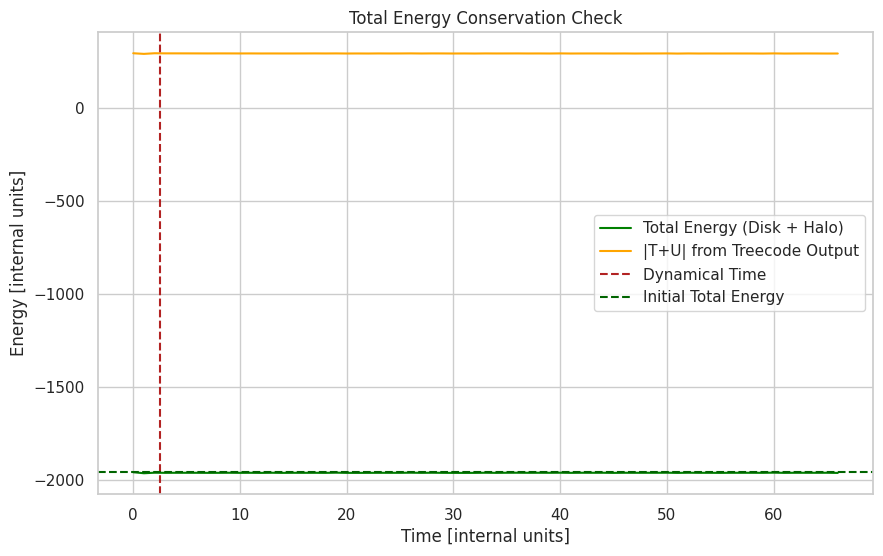

In [138]:
# Print both halo potential energy (snapshot-based and full) for comparison
# Useful for debugging or verifying consistency
print("Halo potential energy (snapshot-based):", pot_en_halo)
print("Halo potential energy (vectorized total):", pot_en_halo_tot)

# Total energy of the system (disk + halo)
en_tot = pot_en_halo + en_disk

# Plot total energy and compare with T+U directly from the treecode
plt.figure(figsize=(10, 6))
plt.plot(t, en_tot, label="Total Energy (Disk + Halo)", color='green')
plt.plot(t, en_disk, label="|T+U| from Treecode Output", color='orange')

# Optional: add dynamical time reference line
plt.axvline(x=t_dyn, color='firebrick', linestyle='--', label='Dynamical Time')

# Optional: add initial energy as reference
plt.axhline(y=en_tot[0], color='darkgreen', linestyle='--', label='Initial Total Energy')

# Axis labels and legend
plt.xlabel("Time [internal units]")
plt.ylabel("Energy [internal units]")
plt.title("Total Energy Conservation Check")

plt.legend()
plt.grid(True)
plt.show()

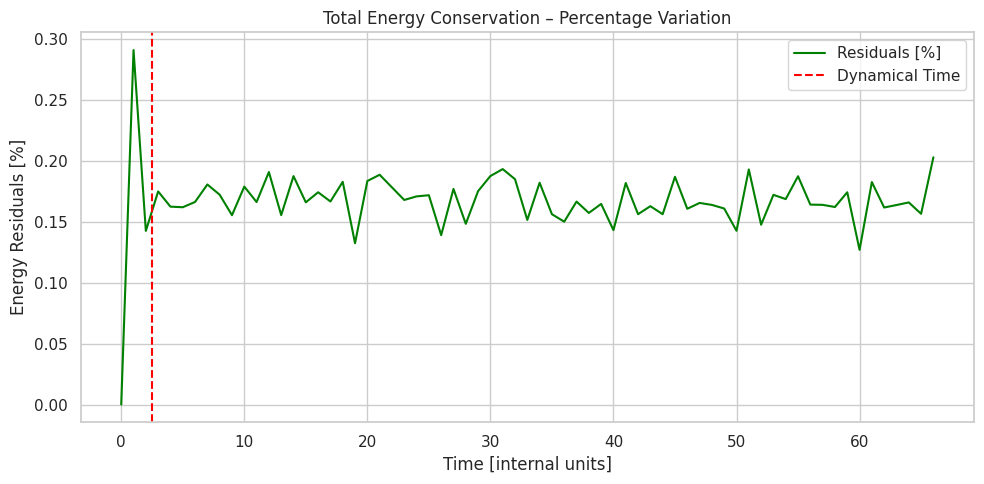

Maximum total energy variation: -0.29%


In [139]:
# Compute residuals as the percentage deviation from the initial total energy
residuals_perc = (en_tot - en_tot[0]) * 100 / en_tot[0]

# Plot percentage residuals of total energy over time
plt.figure(figsize=(10, 5))
plt.plot(t, residuals_perc, label="Residuals [%]", color='green')
plt.axvline(x=t_dyn, color='red', linestyle='--', label='Dynamical Time')

# Axis labels and title
plt.xlabel("Time [internal units]")
plt.ylabel("Energy Residuals [%]")
plt.title("Total Energy Conservation – Percentage Variation")

# Add legend
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print total percentage variation of energy over the simulation
variation = 100 * (np.max(en_tot) - np.min(en_tot)) / en_tot[0]
print(f"Maximum total energy variation: {variation:.2f}%")